# <span style="color:blue"> *Setups* </span>

In [1]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

In [2]:
### solve the auto-complete issue

%config Completer.use_jedi = False

In [3]:
### lvl 1 setups

import sys
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
### matplotlib setups
## set the line width of the hatch

mpl.rcParams['hatch.linewidth'] = 0.5

In [6]:
### lvl 2 setups (user)
import pickle
from matplotlib.patches import Ellipse, Polygon
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs
from AdvisorMao import *

# <span style="color:blue"> *Configuration* </span>

In [7]:
### configuration
shp='shp/china.shp'
shp_9d='shp/china_nine_dotted_line.shp'
shp_b='shp/china_country.shp'

In [8]:
with open("data/data_dict.pkl",'rb') as cf:
    dic_data = pickle.load(cf)

In [9]:
lon=np.linspace(70.05,139.95,700)
lat=np.linspace(54.95,15.05,400)
time=pd.date_range(start='1983',end='2019',freq='y')
X,Y=np.meshgrid(lon,lat)

# <span style="color:blue"> *Main* </span>

Text(0.5, 1.0, '')

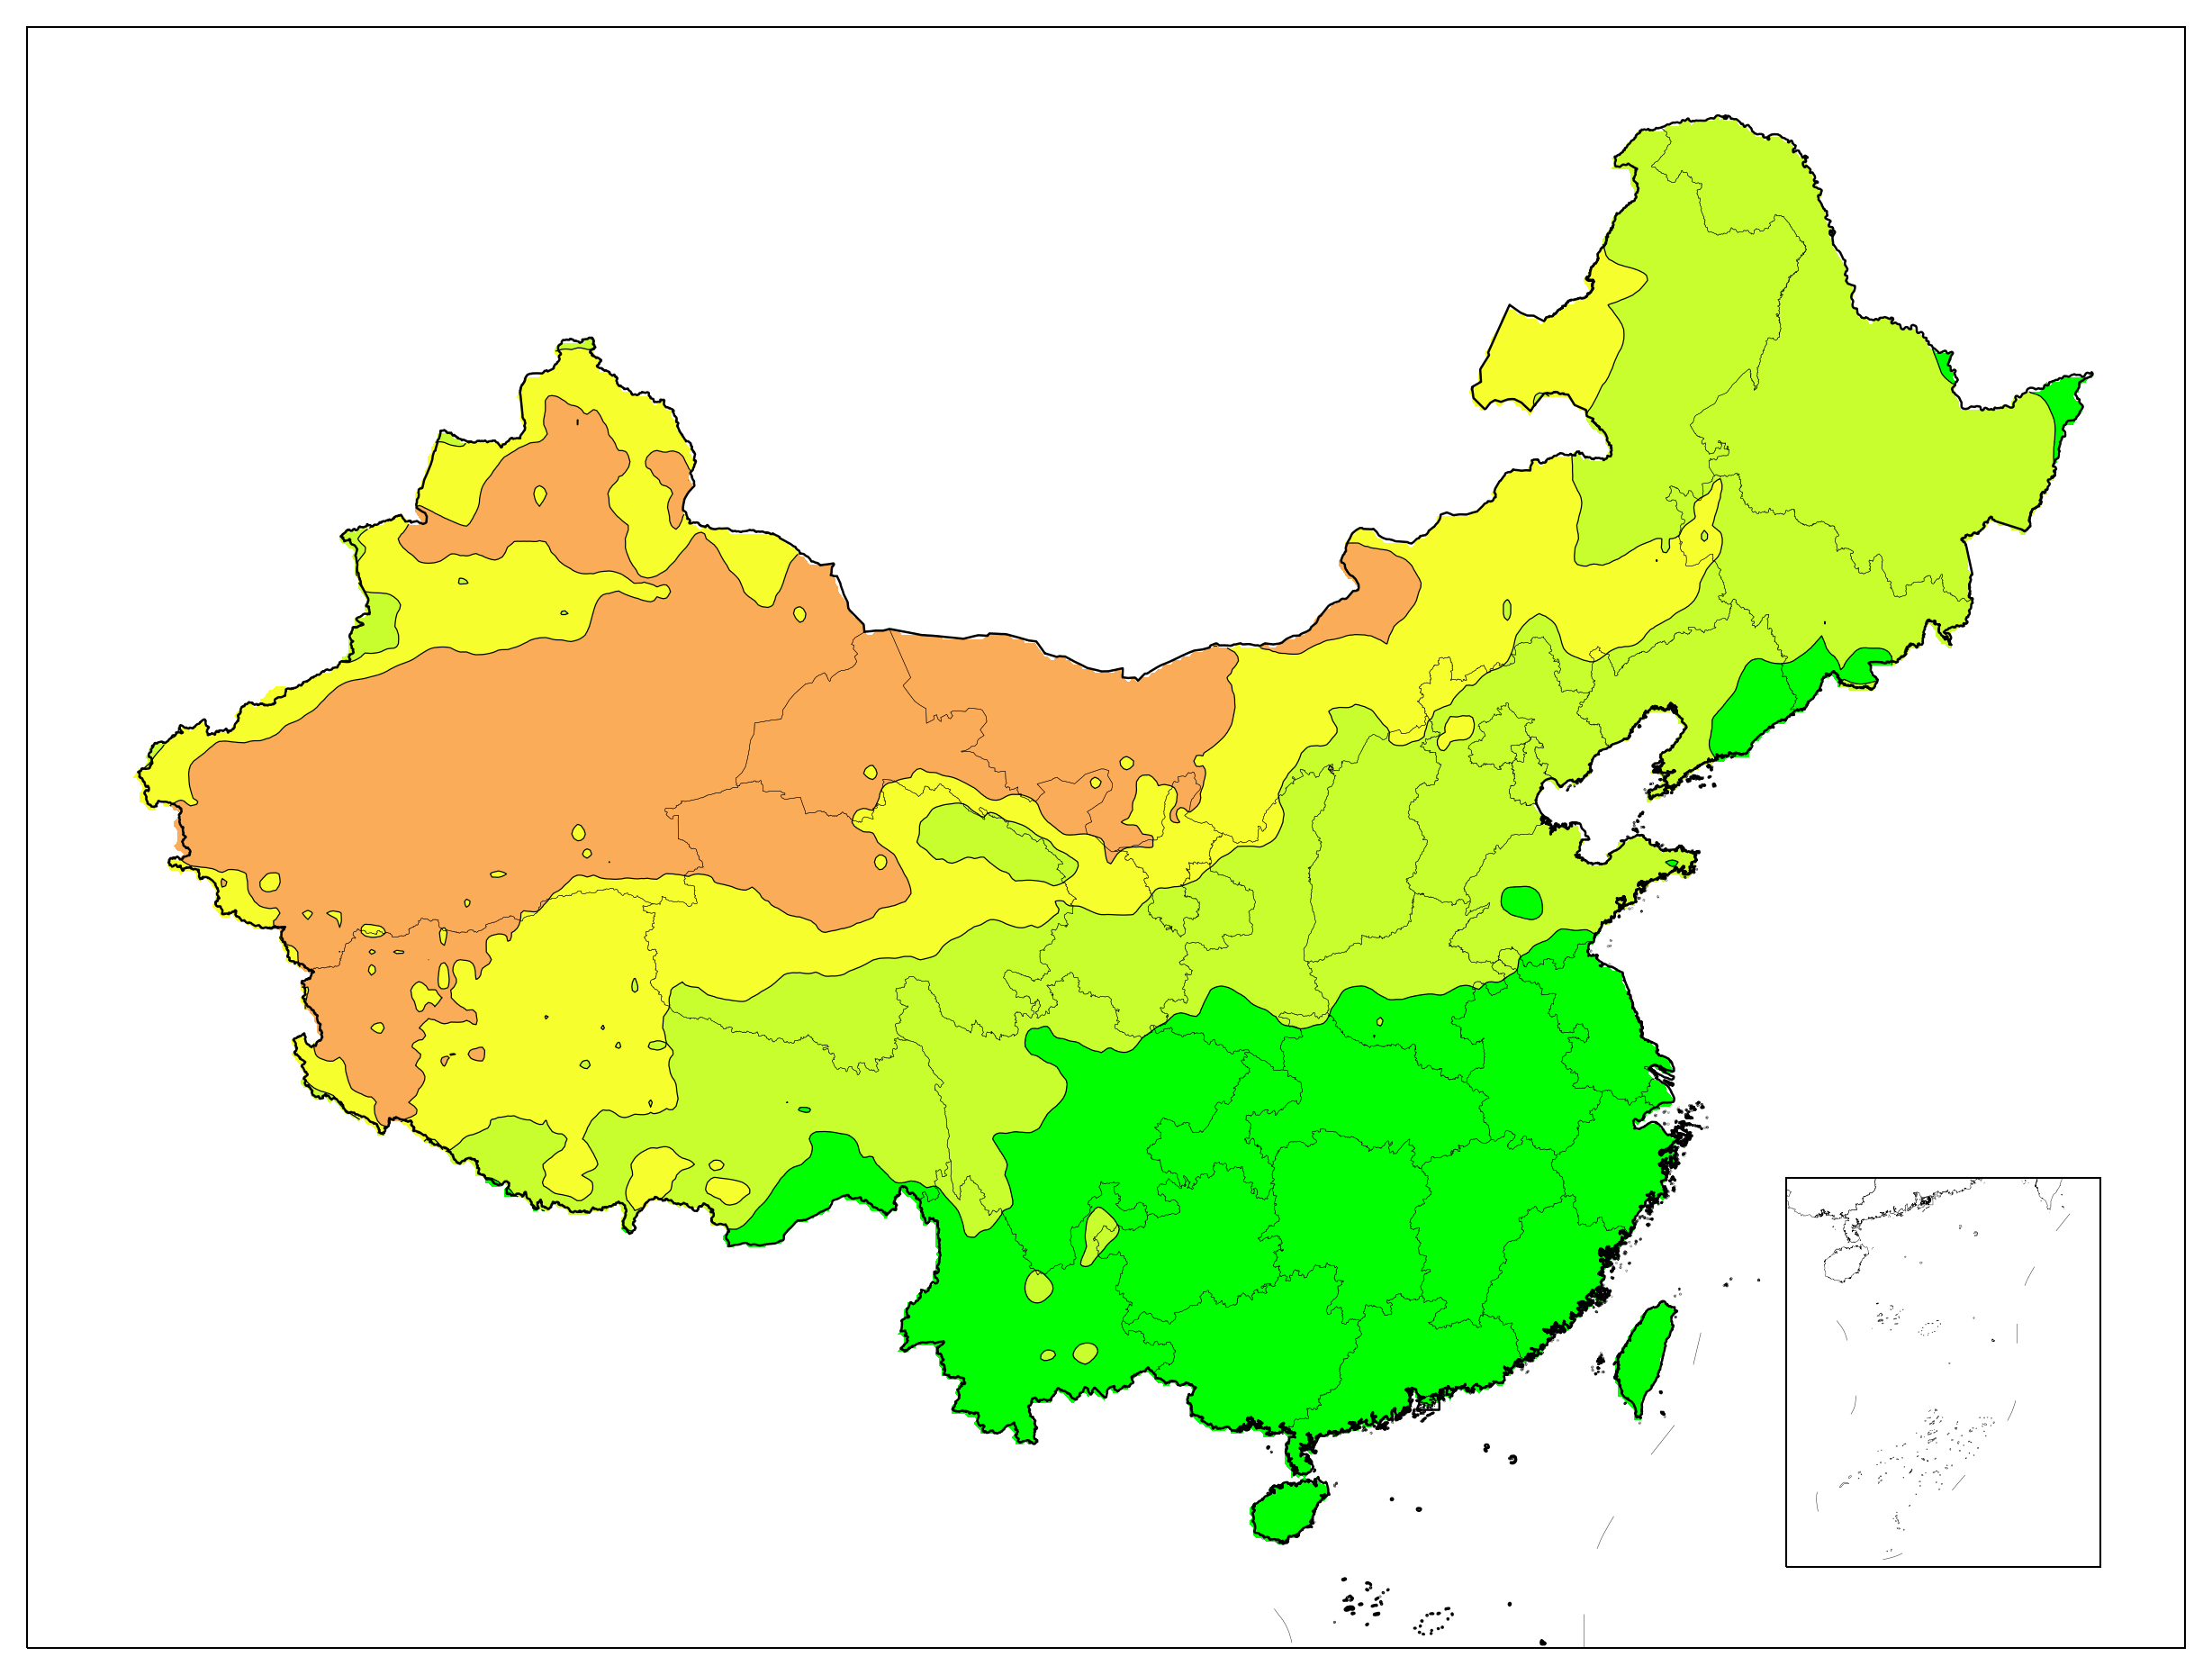

In [10]:
cmap = cm.get_cmap('gist_rainbow')
clim = [0, 2500]
ticks = list(np.linspace(0, 2500, 6))
unit = 'precipitation (mm/yr)'
figsize=(10,5)
dpi=500

mean_p=dic_data['mean_p']

fig, ax, ax_ = basemap_(proj_name='Mercator', facecolor='none', cn_map=True, figsz=(10,6))
ax = stack_shp_cn(ax, ax_, shp, shp_9d, facecolor='none', edgecolor='k', linewidth=0.1, alpha=1, zorder=1)
ax = stack_shp(ax,  shp_b, facecolor='none', edgecolor='k', linewidth=0.6, alpha=1, zorder=2)

ax.contourf(X,Y,mean_p,levels=[0,200,400,800,3999],transform=ccrs.PlateCarree(),colors=['#FAAC58','#F7FE2E','#C8FE2E','#00FF00'])
ax.contour(X,Y,mean_p,levels=[200,400,800],transform=ccrs.PlateCarree(),linewidths=0.3,colors='k',label=True)

ax.set_extent([70, 138, 15, 50])
ax.set_title('')

Text(0.5, 1.0, '')

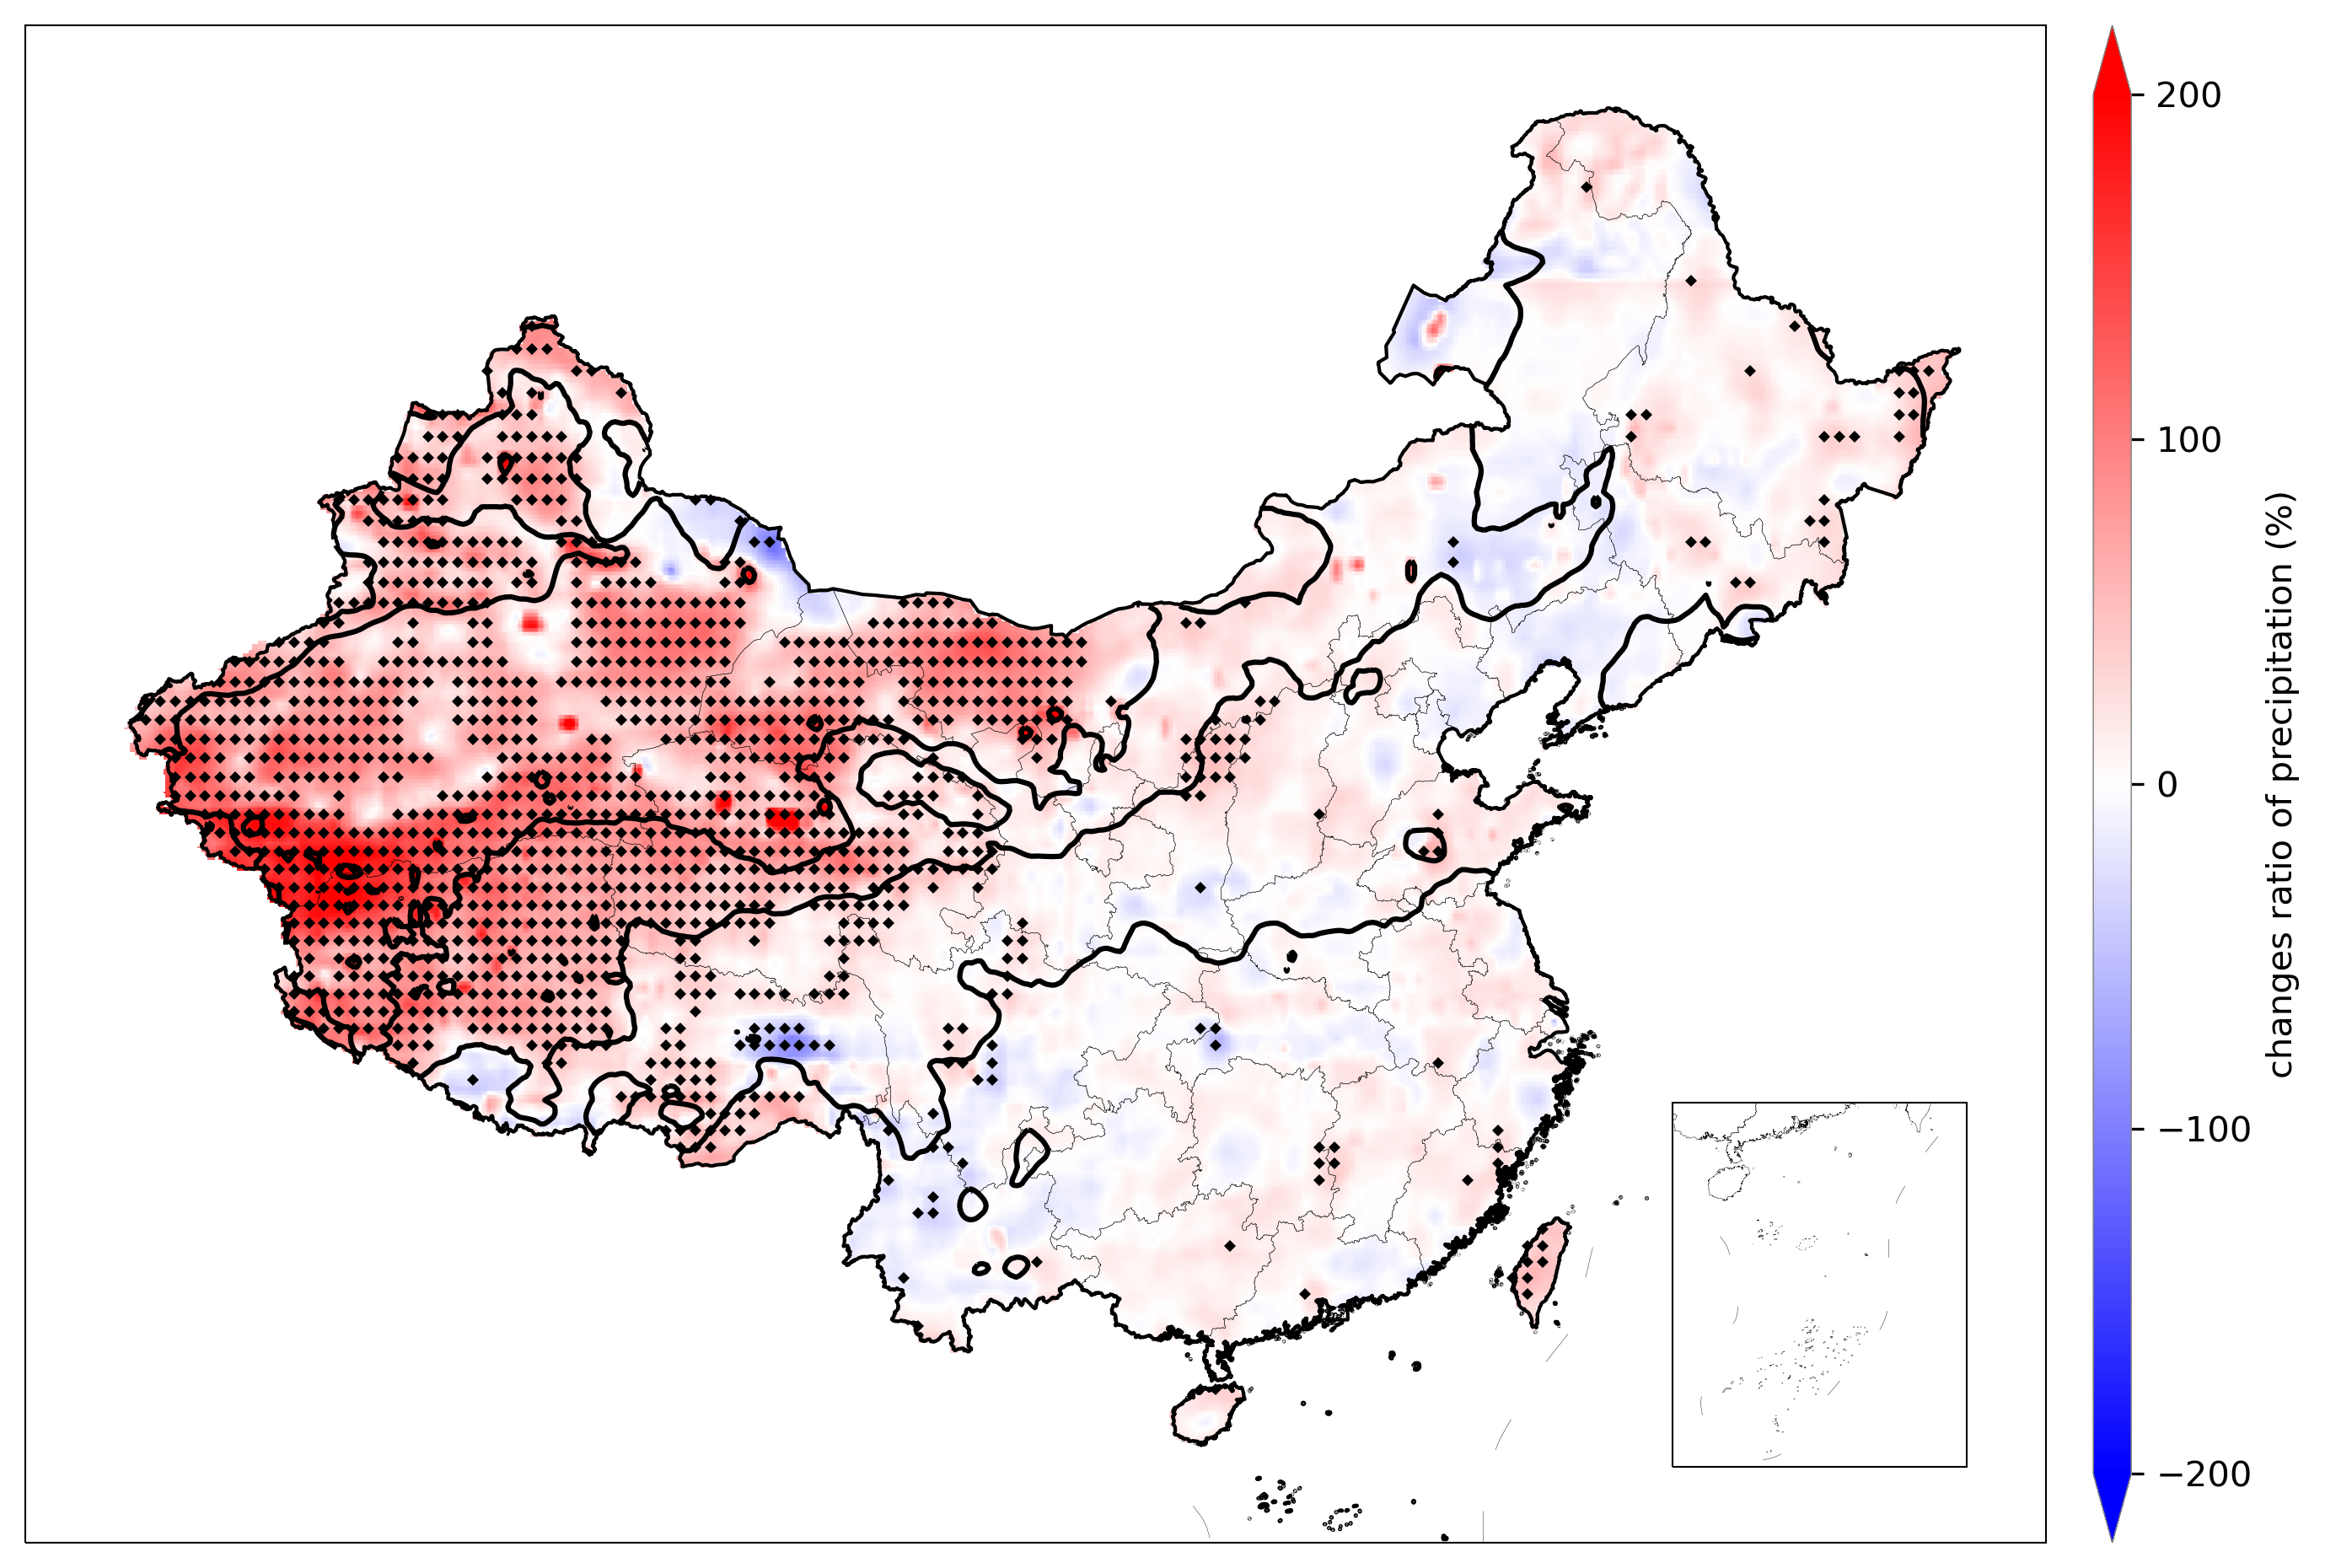

In [11]:
cmap = cm.get_cmap('bwr')
clim = [-200, 200]
ticks = list(np.linspace(-200, 200,5))
unit = 'changes ratio of precipitation (%)'

p_p=dic_data['p_p']
cr_p=dic_data['cr_p']

lon_xx, lat_xx = np.meshgrid(lon[0:-1:5], lat[0:-1:5])
p_p_up=upscale(p_p,5,skipna=True)
x = lon_xx[p_p_up<0.05]
y = lat_xx[p_p_up<0.05]

figsize=(10,4)
dpi=500

fig, ax, ax_ = basemap_(proj_name='Mercator', facecolor='none', cn_map=True, figsz=(10,6))
ax = stack_shp_cn(ax, ax_, shp, shp_9d, facecolor='none', edgecolor='k', linewidth=0.1, alpha=1, zorder=1)
ax = stack_shp(ax,  shp_b, facecolor='none', edgecolor='k', linewidth=1, alpha=1, zorder=2)
fig, ax = stack_image_(fig, ax, lon, lat,cr_p, clim=clim, ticks = ticks, 
                      ticklabels=[], unit=unit, zorder=0, cmap =cmap,extend='both',cb_or='vertical')
ax.contour(X,Y,mean_p,levels=[200,400,800],transform=ccrs.PlateCarree(),linewidths=1.5,colors='k',label=True)
ax = stack_hatch(ax, x, y, data='', hatche='D', color='k', ms=2.5)
ax.set_extent([70, 138, 15, 50])
ax.set_title('')

Text(0.5, 1.0, '')

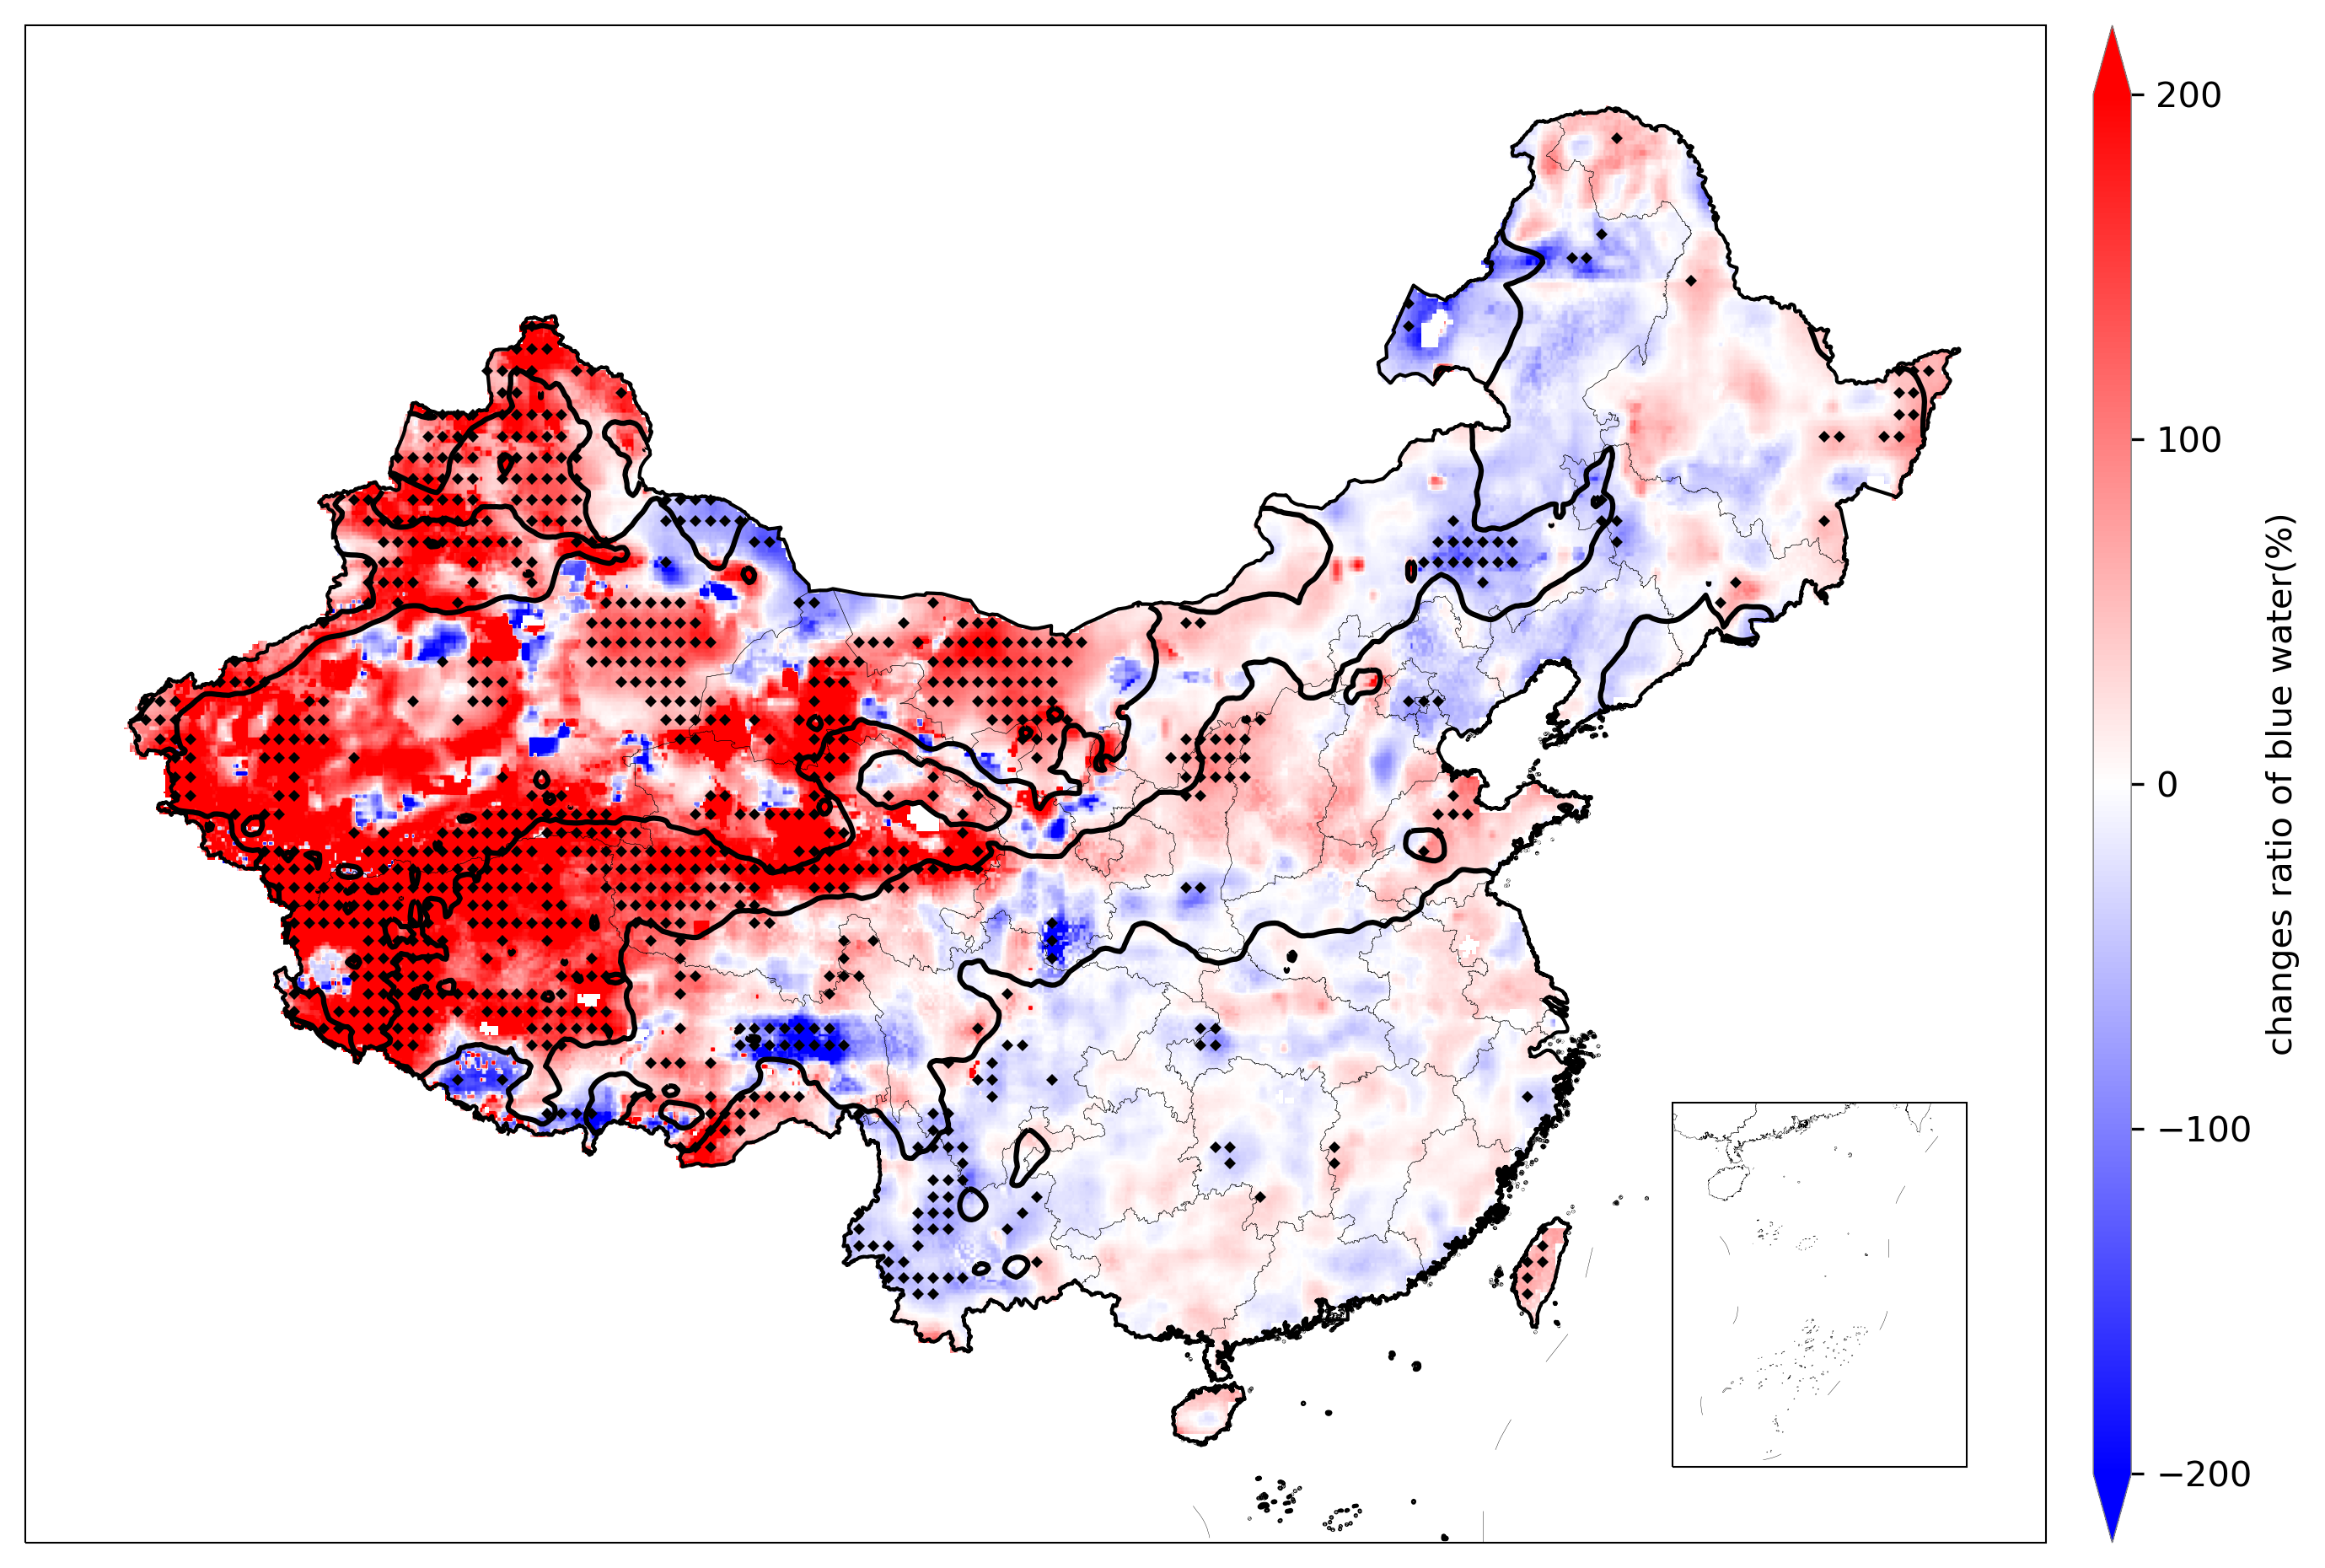

In [12]:
cmap = cm.get_cmap('bwr')
dc = 100/4
clim = [-200, 200]
ticks = list(np.linspace(-200, 200,5))
unit = 'changes ratio of blue water(%)'

p_b=dic_data['p_b']
cr_b=dic_data['cr_b']

lon_xx, lat_xx = np.meshgrid(lon[0:-1:5], lat[0:-1:5])
p_b_up=upscale(p_b,5,skipna=True)
x = lon_xx[p_b_up<0.05]
y = lat_xx[p_b_up<0.05]

figsize=(10,4)
dpi=500

fig, ax, ax_ = basemap_(proj_name='Mercator', facecolor='none', cn_map=True, figsz=(10,6))
ax = stack_shp_cn(ax, ax_, shp, shp_9d, facecolor='none', edgecolor='k', linewidth=0.1, alpha=1, zorder=1)
ax = stack_shp(ax,  shp_b, facecolor='none', edgecolor='k', linewidth=1, alpha=1, zorder=2)
fig, ax = stack_image_(fig, ax, lon, lat,cr_b, clim=clim, ticks = ticks, 
                      ticklabels=[], unit=unit, zorder=0, cmap =cmap,extend='both',cb_or='vertical')
ax.contour(X,Y,mean_p,levels=[200,400,800],transform=ccrs.PlateCarree(),linewidths=1.5,colors='k',label=True)
ax = stack_hatch(ax, x, y, data='', hatche='D', color='k', ms=2.5)
ax.set_extent([70, 138, 15, 50])
ax.set_title('')

Text(0.5, 1.0, '')

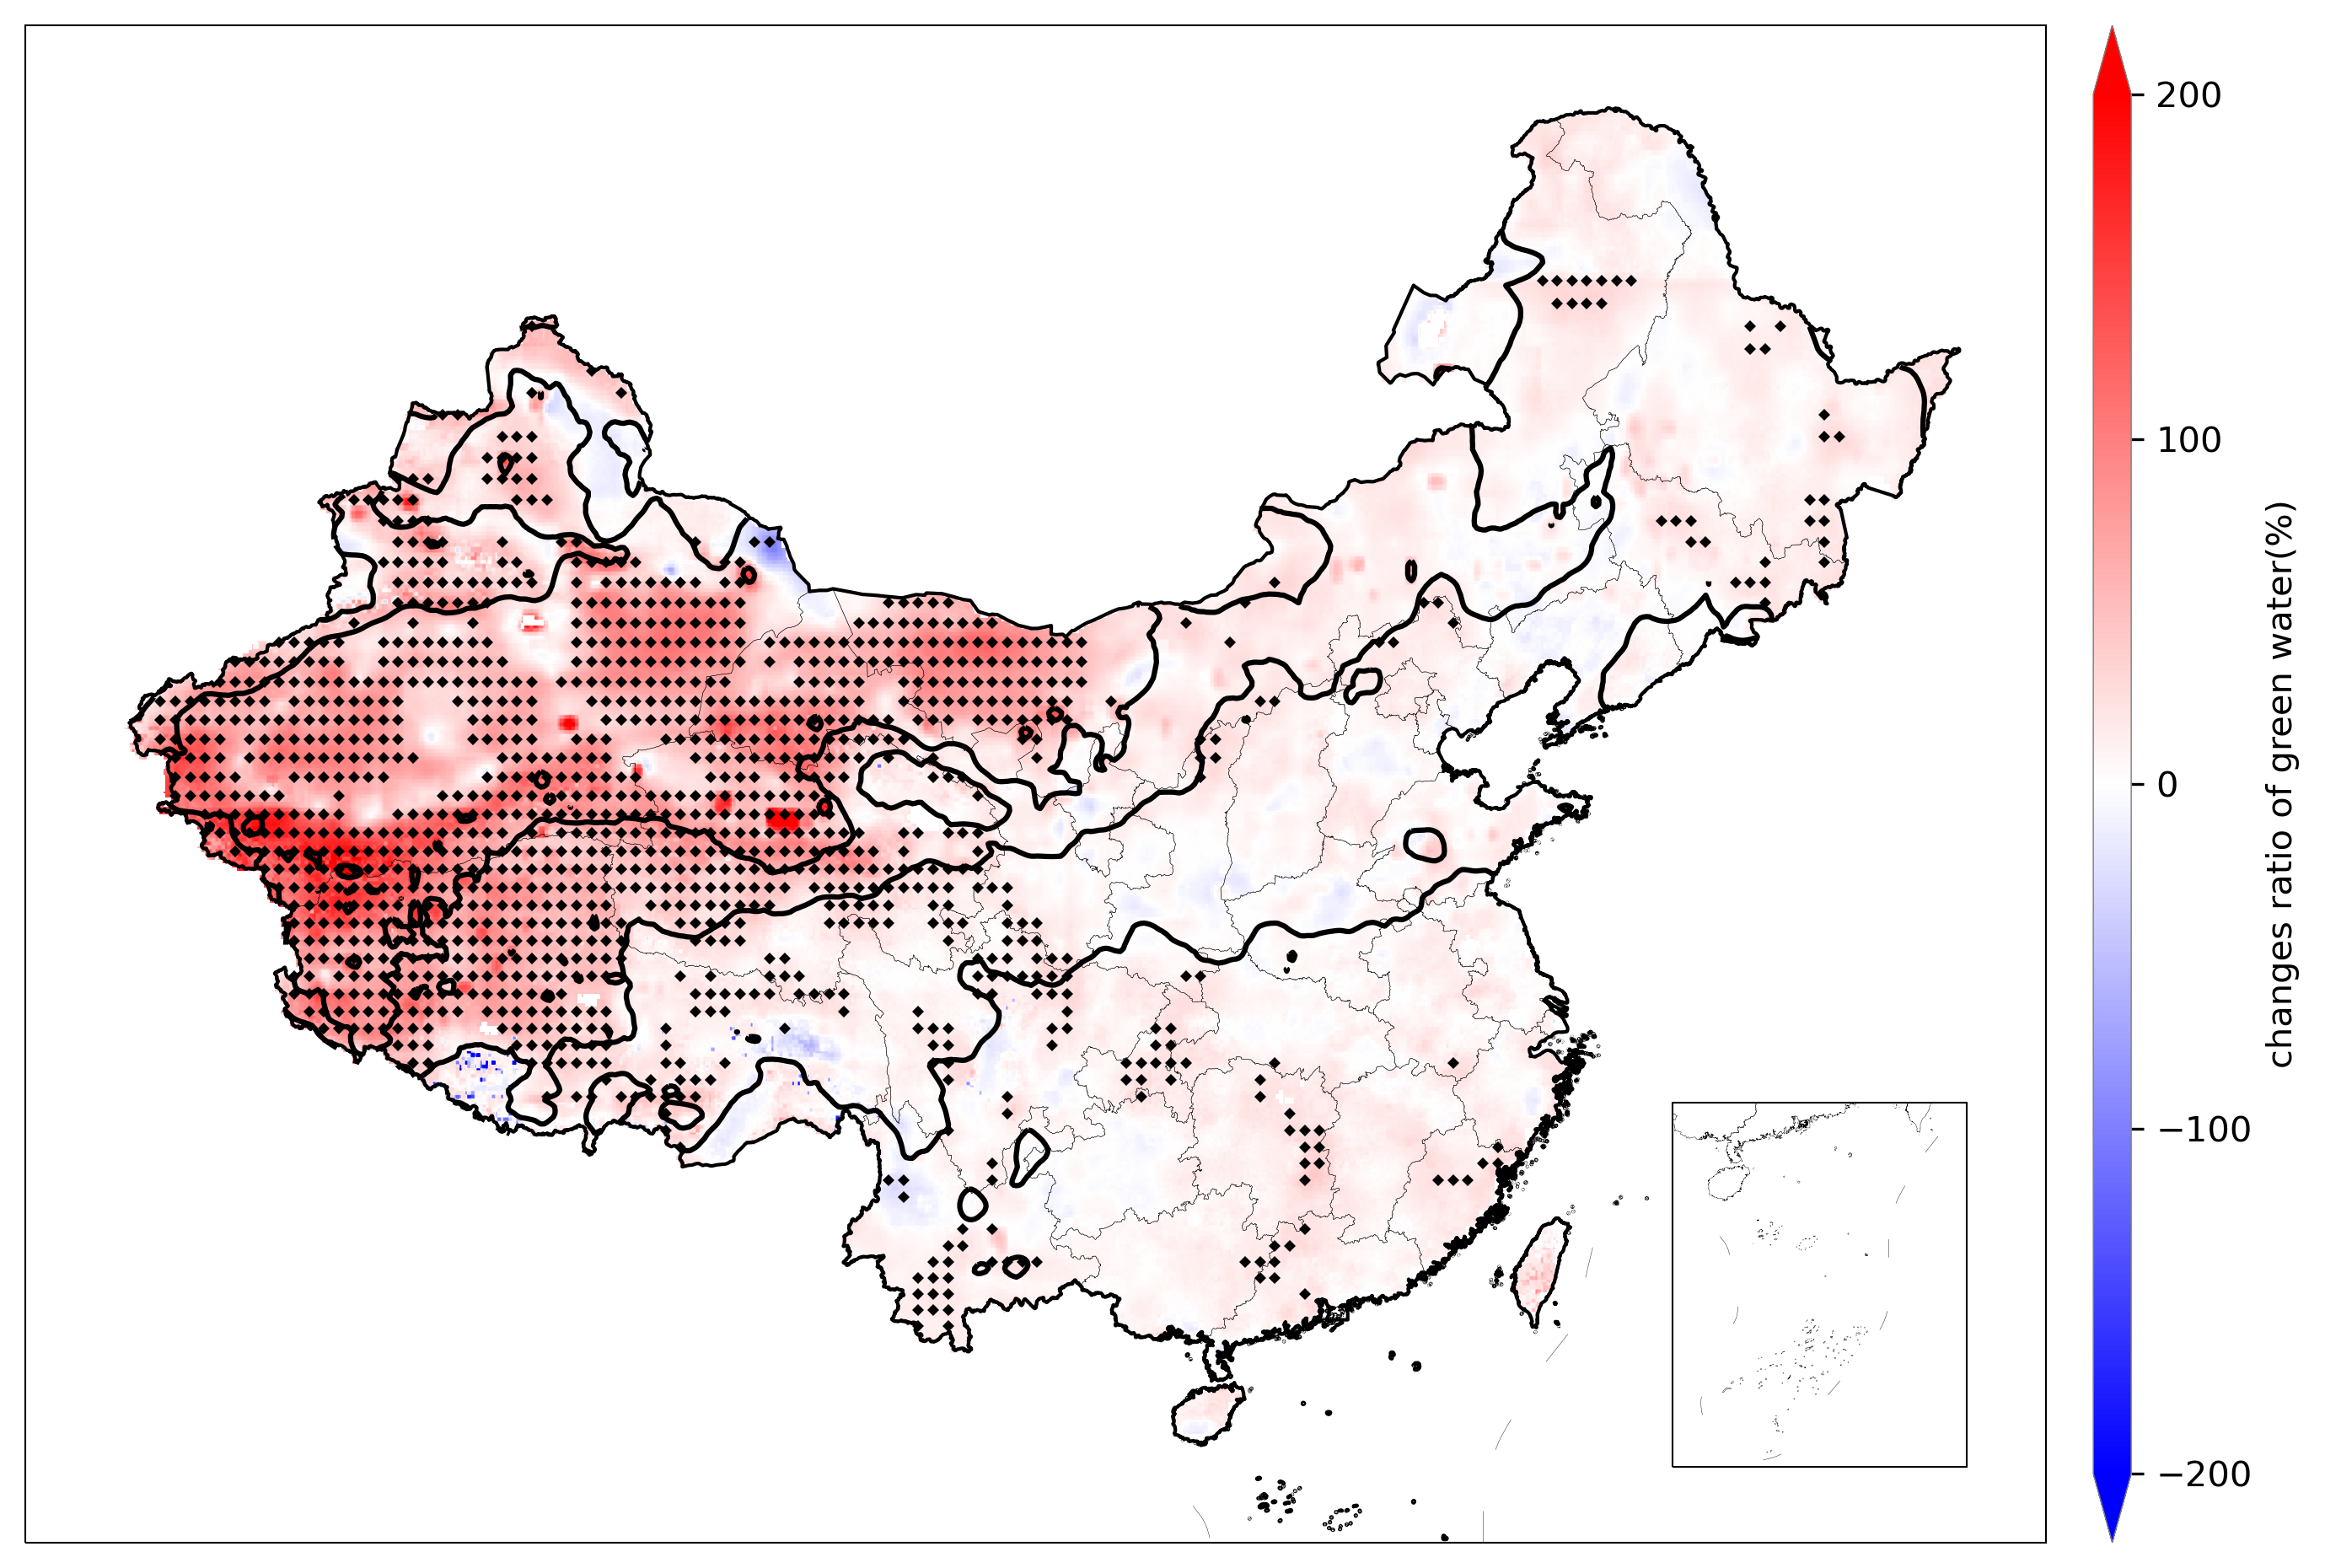

In [13]:
cmap = cm.get_cmap('bwr')
dc = 100/4
clim = [-200, 200]
ticks = list(np.linspace(-200, 200,5))
unit = 'changes ratio of green water(%)'

p_g=dic_data['p_g']
cr_g=dic_data['cr_g']

lon_xx, lat_xx = np.meshgrid(lon[0:-1:5], lat[0:-1:5])
p_g_up=upscale(p_g,5,skipna=True)
x = lon_xx[p_g_up<0.05]
y = lat_xx[p_g_up<0.05]

figsize=(10,4)
dpi=500

fig, ax, ax_ = basemap_(proj_name='Mercator', facecolor='none', cn_map=True, figsz=(10,6))
ax = stack_shp_cn(ax, ax_, shp, shp_9d, facecolor='none', edgecolor='k', linewidth=0.1, alpha=1, zorder=1)
ax = stack_shp(ax,  shp_b, facecolor='none', edgecolor='k', linewidth=1, alpha=1, zorder=2)
fig, ax = stack_image_(fig, ax, lon, lat,cr_g, clim=clim, ticks = ticks, 
                      ticklabels=[], unit=unit, zorder=0, cmap =cmap,extend='both',cb_or='vertical')
ax.contour(X,Y,mean_p,levels=[200,400,800],transform=ccrs.PlateCarree(),linewidths=1.5,colors='k',label=True)

ax = stack_hatch(ax, x, y, data='', hatche='D', color='k', ms=2.5)
ax.set_extent([70, 138, 15, 50])
ax.set_title('')

In [14]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
top = cm.get_cmap('Blues_r', 127)
bottom = cm.get_cmap('Greens', 127)
newcolors = np.vstack((top(np.linspace(0, 1, 127)),bottom(np.linspace(0, 1, 127))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

Text(0.5, 1.0, '')

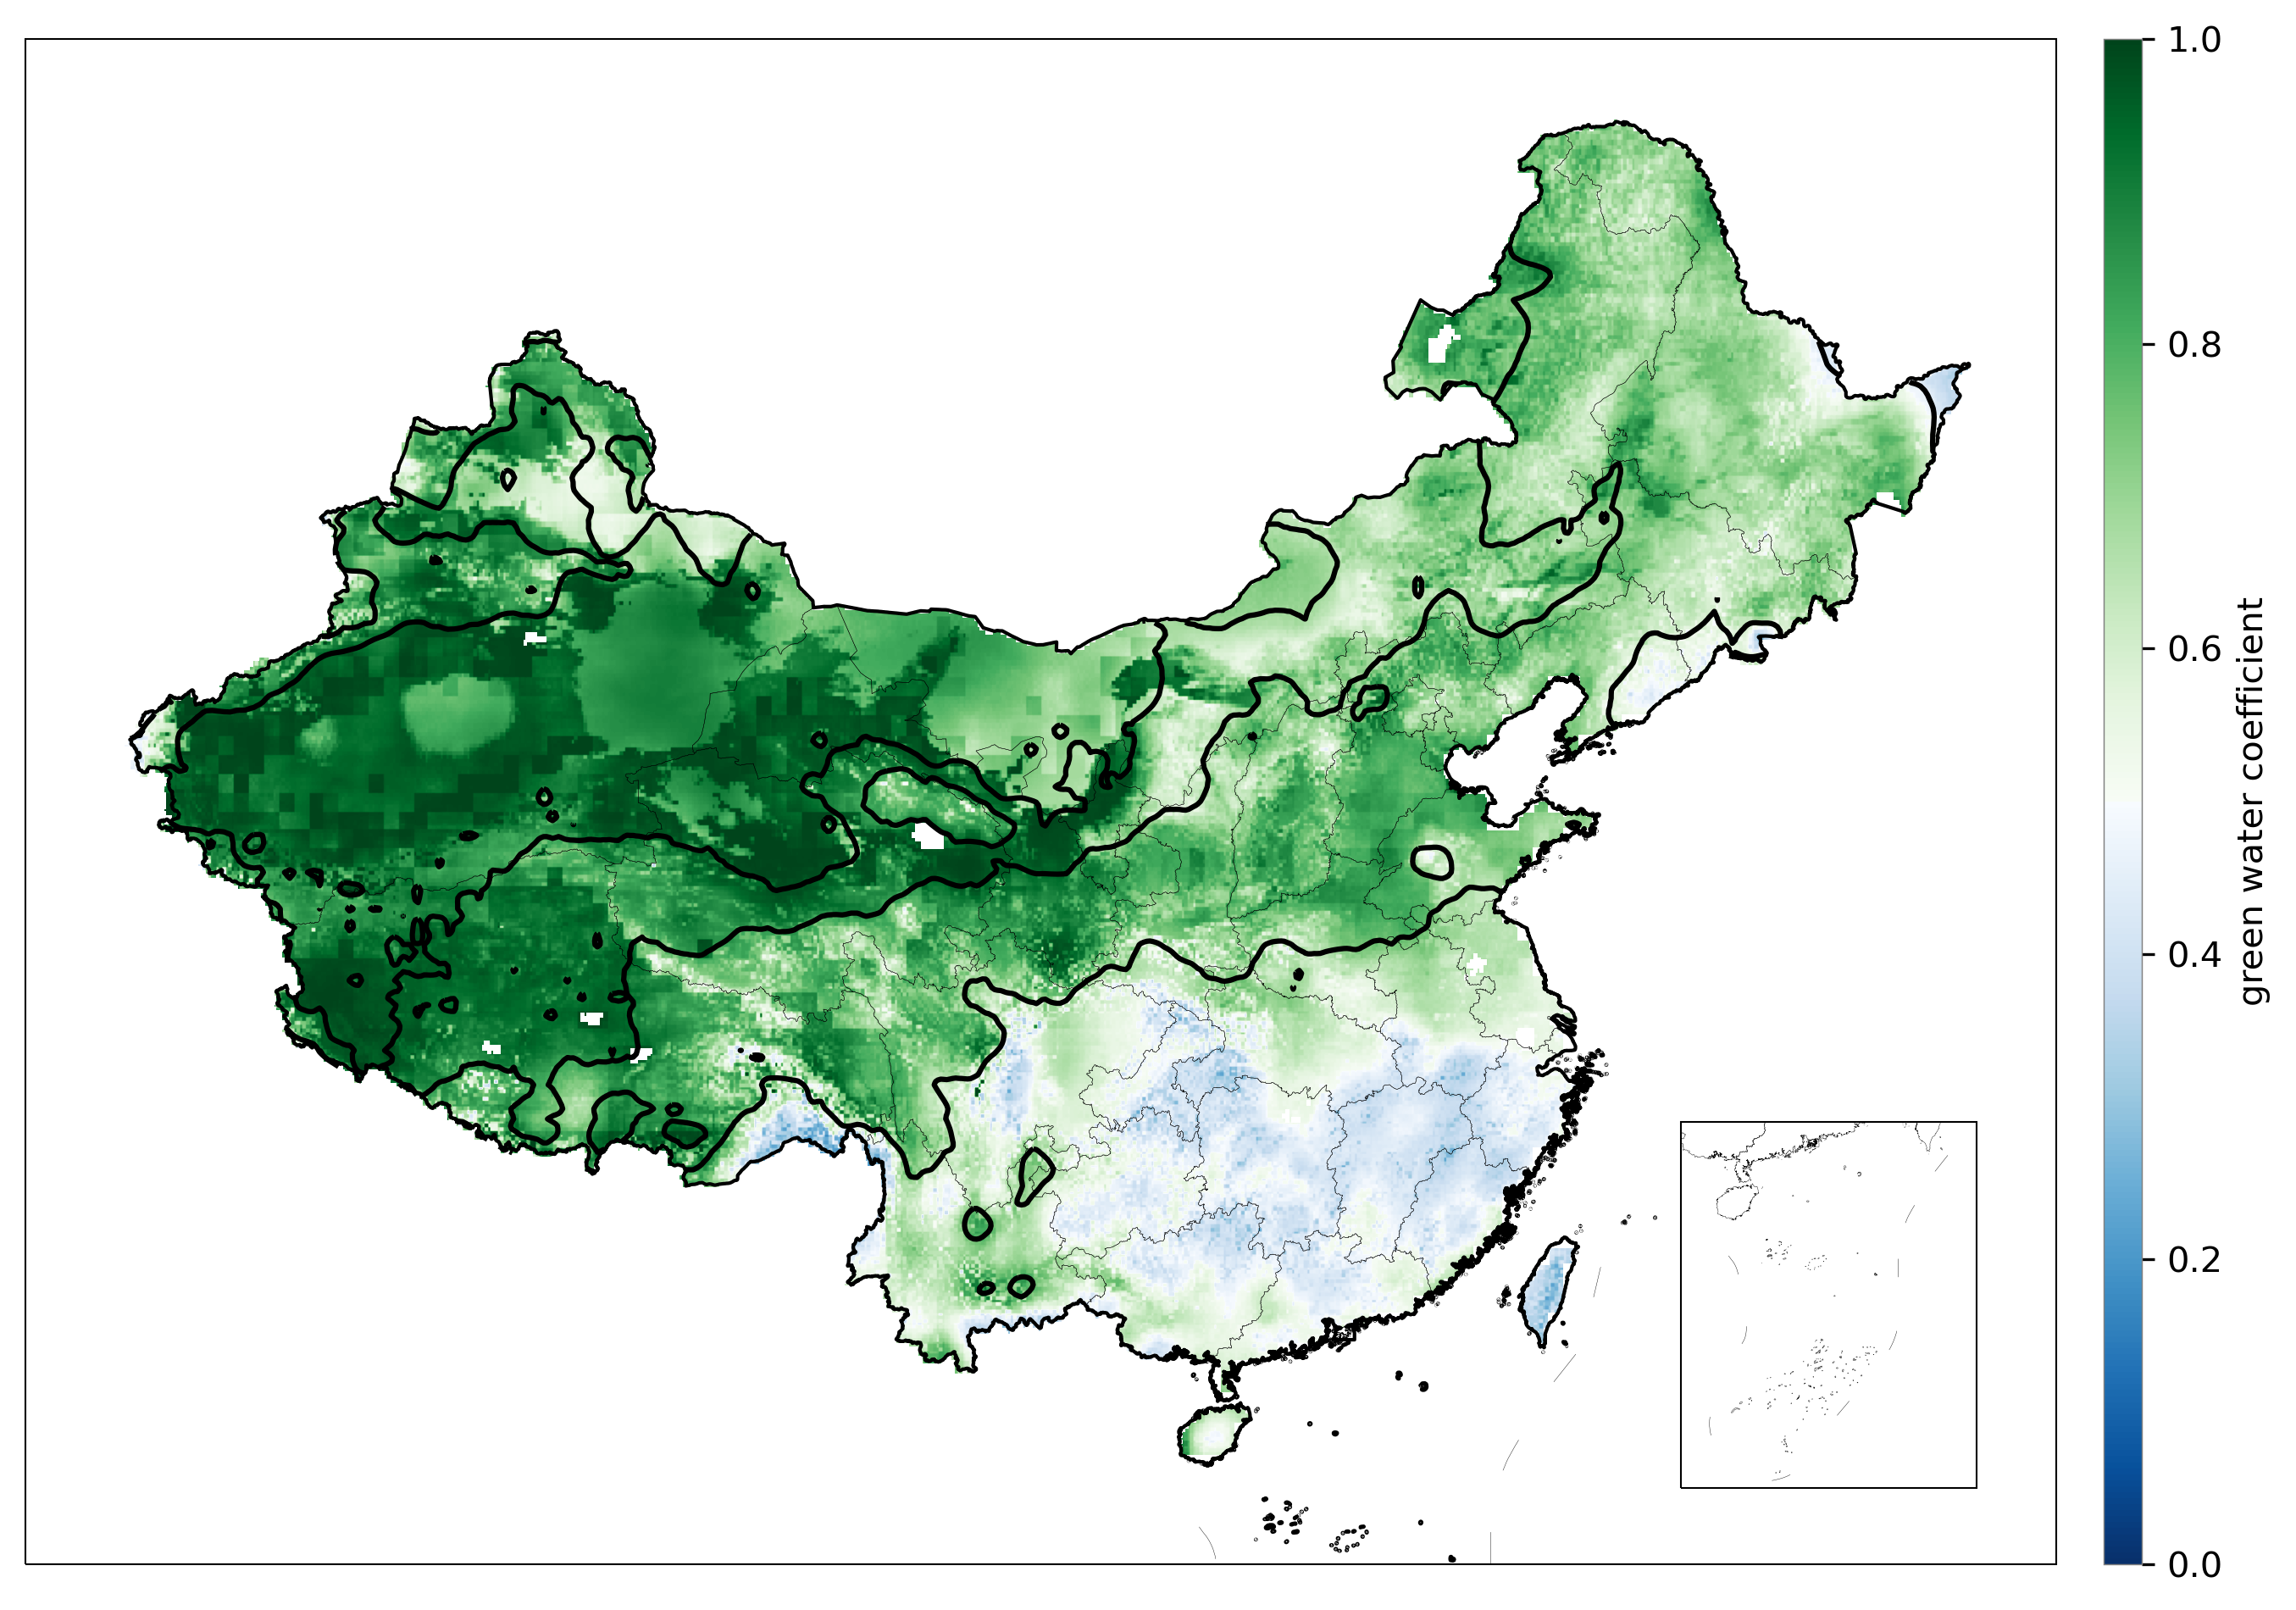

In [15]:
cmap = newcmp
dc = 100/4
clim = [0, 1]
ticks = list(np.linspace(0, 1,6))
unit = 'green water coefficient'
mean_c=dic_data['mean_c']

figsize=(10,5)
dpi=500

fig, ax, ax_ = basemap_(proj_name='Mercator', facecolor='none', cn_map=True, figsz=(10,6))
ax = stack_shp_cn(ax, ax_, shp, shp_9d, facecolor='none', edgecolor='k', linewidth=0.1, alpha=1, zorder=1)
ax = stack_shp(ax,  shp_b, facecolor='none', edgecolor='k', linewidth=1, alpha=1, zorder=2)
fig, ax = stack_image_(fig, ax, lon, lat,mean_c, clim=clim, ticks = ticks, 
                      ticklabels=[], unit=unit, zorder=0, cmap =cmap,extend='neither',cb_or='vertical')
ax.contour(X,Y,mean_p,levels=[200,400,800],transform=ccrs.PlateCarree(),linewidths=1.5,colors='k',label=True)
ax.set_extent([70, 138, 15, 50])
ax.set_title('')

In [16]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
top = cm.get_cmap('Greens_r', 127)
bottom = cm.get_cmap('Blues', 127)
newcolors = np.vstack((top(np.linspace(0, 1, 127)),bottom(np.linspace(0, 1, 127))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

Text(0.5, 1.0, '')

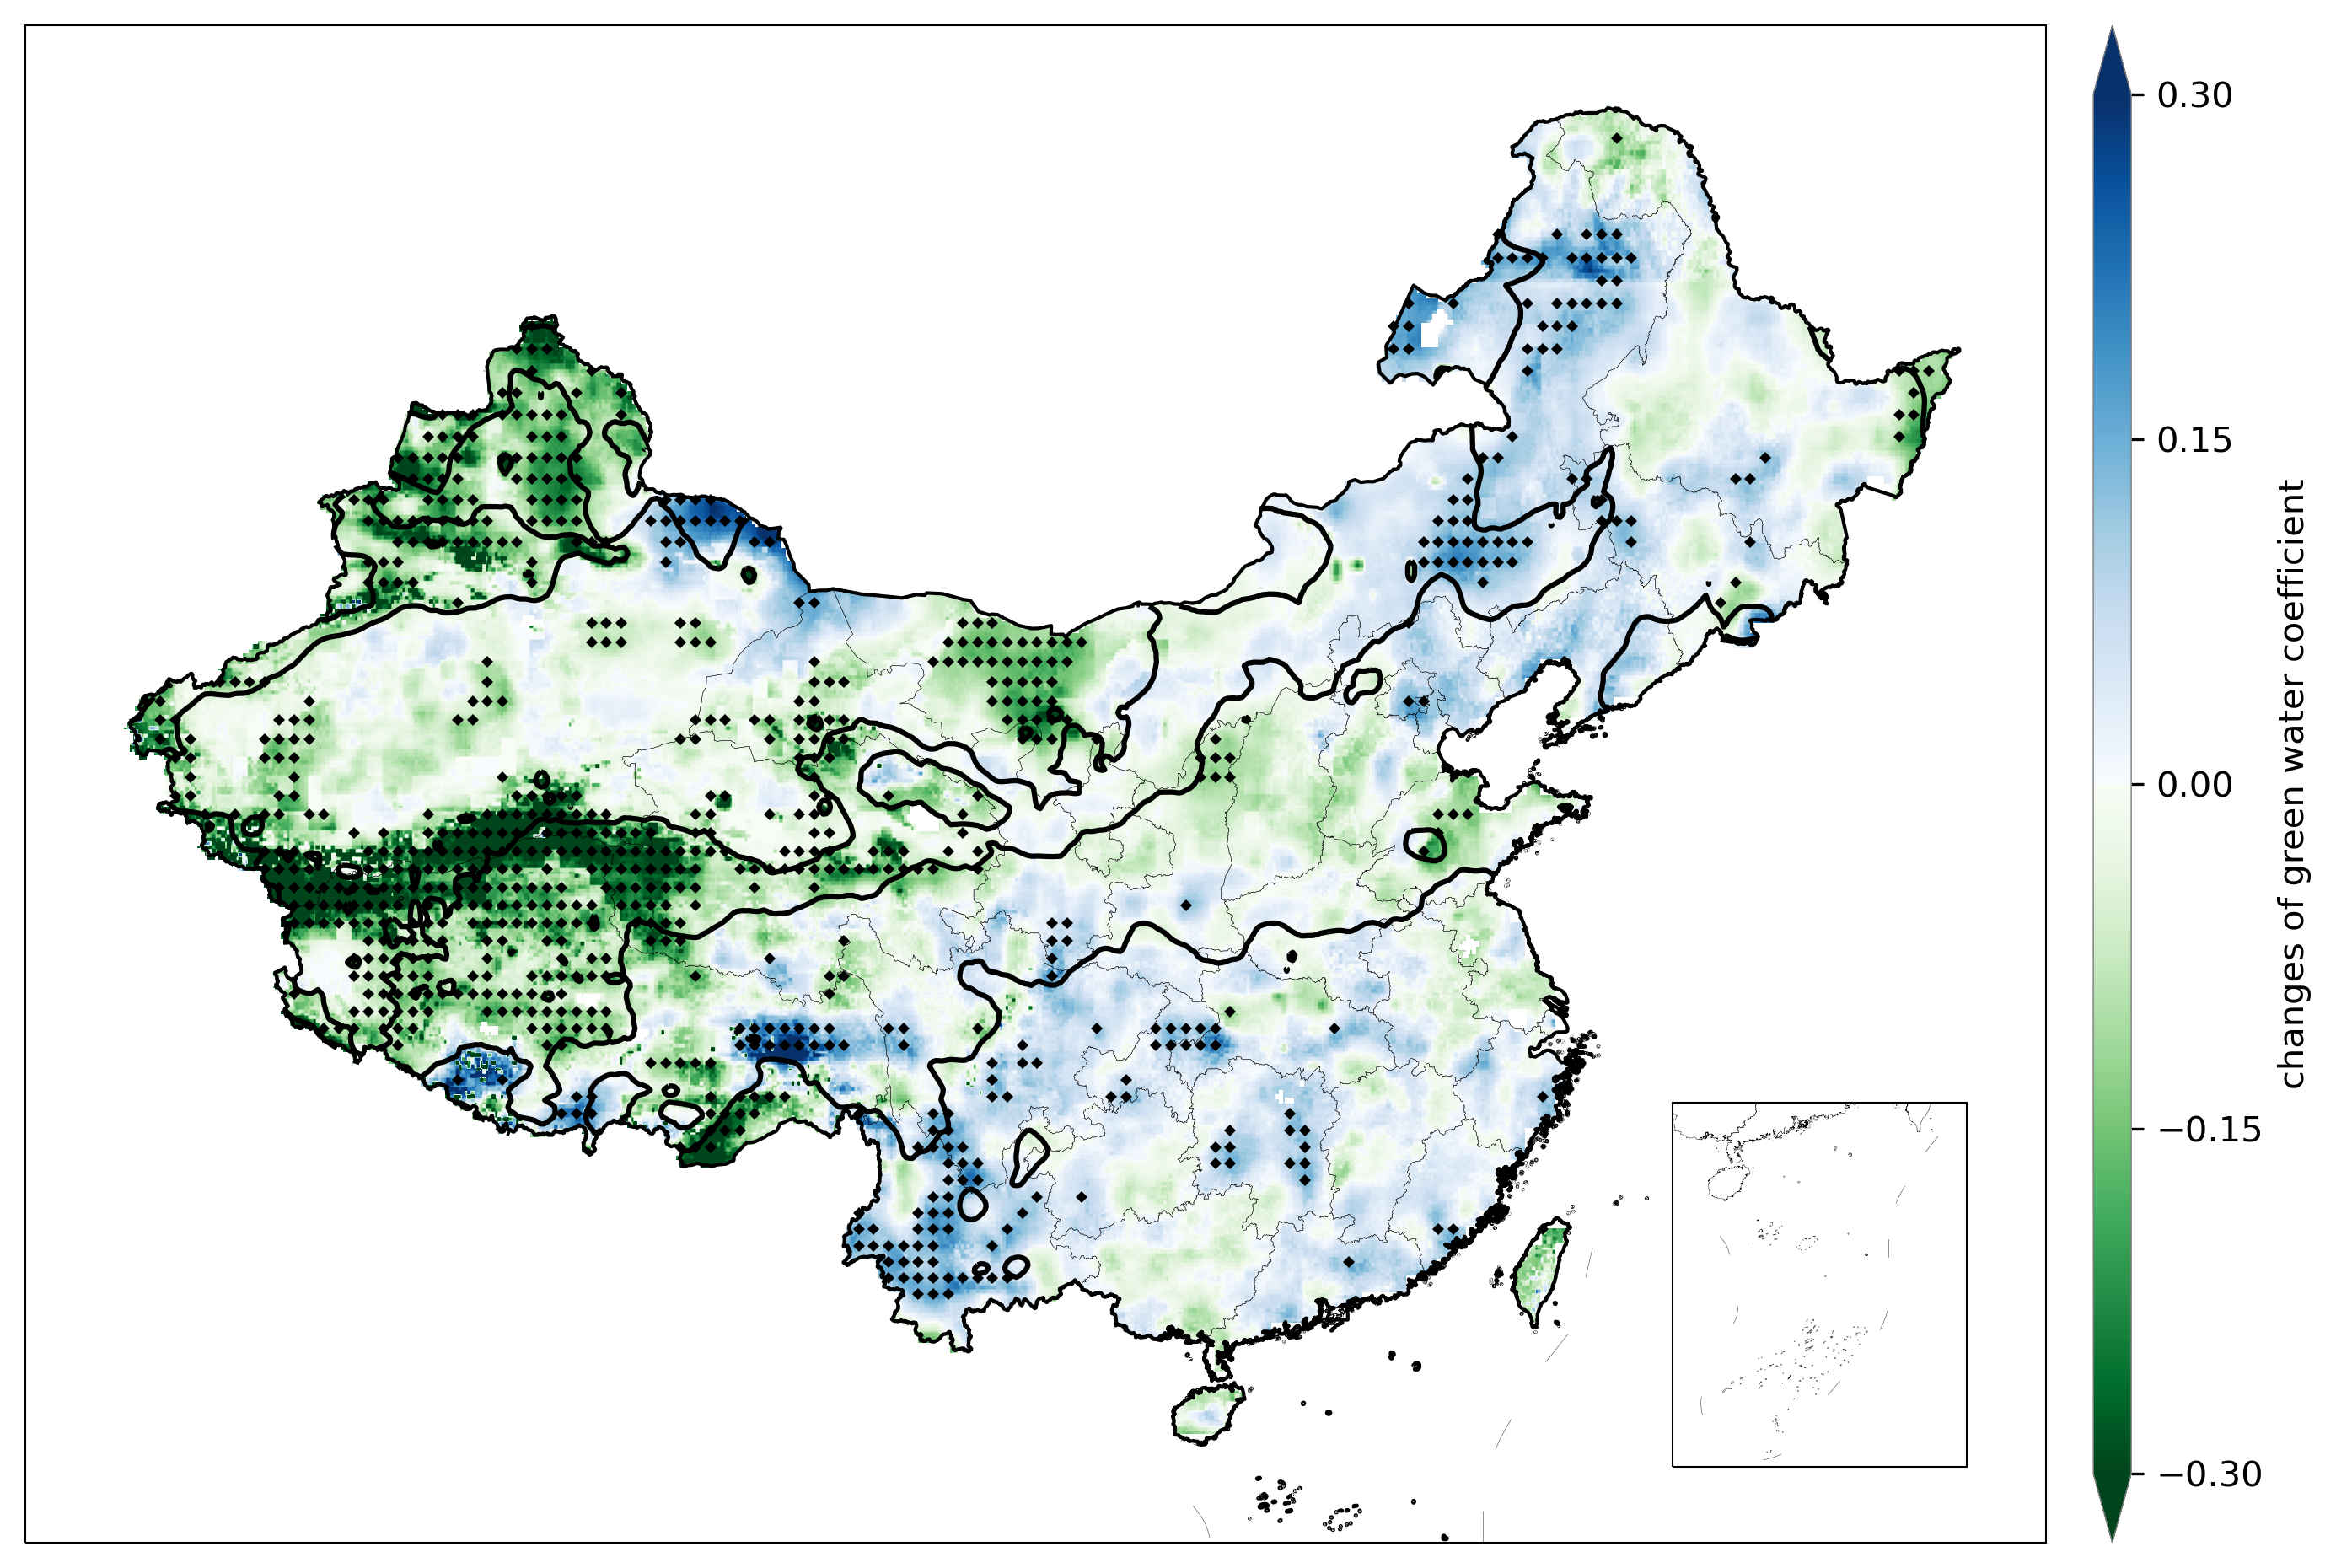

In [17]:
cmap = newcmp
dc = 100/4
clim = [-0.3, 0.3]
ticks = list(np.linspace(-0.3, 0.3,5))
unit = 'changes of green water coefficient'

cv_c=dic_data['cv_c']
p_c=dic_data['p_c']

lon_xx, lat_xx = np.meshgrid(lon[0:-1:5], lat[0:-1:5])
p_c_up=upscale(p_c,5,skipna=True)
x = lon_xx[p_c_up<0.05]
y = lat_xx[p_c_up<0.05]
figsize=(10,4)
dpi=500

fig, ax, ax_ = basemap_(proj_name='Mercator', facecolor='none', cn_map=True, figsz=(10,6))
ax = stack_shp_cn(ax, ax_, shp, shp_9d, facecolor='none', edgecolor='k', linewidth=0.1, alpha=1, zorder=1)
ax = stack_shp(ax,  shp_b, facecolor='none', edgecolor='k', linewidth=1, alpha=1, zorder=2)
fig, ax = stack_image_(fig, ax, lon, lat,cv_c, clim=clim, ticks = ticks, 
                      ticklabels=[], unit=unit, zorder=0, cmap =cmap,extend='both',cb_or='vertical')
ax.contour(X,Y,mean_p,levels=[200,400,800],transform=ccrs.PlateCarree(),linewidths=1.5,colors='k',label=True)

ax = stack_hatch(ax, x, y, data='', hatche='D', color='k', ms=2.5)
ax.set_extent([70, 138, 15, 50])
ax.set_title('')

In [18]:
ds_dro_ceof=xr.open_dataset('data/coef_dro.nc')
arr_dro_coef=ds_dro_ceof.depth.values

ds_semidro_ceof=xr.open_dataset('data/coef_semidro.nc')
arr_semidro_coef=ds_semidro_ceof.depth.values

ds_semiwet_ceof=xr.open_dataset('data/coef_semiwet.nc')
arr_semiwet_coef=ds_semiwet_ceof.depth.values

ds_wet_ceof=xr.open_dataset('data/coef_wet.nc')
arr_wet_coef=ds_wet_ceof.depth.values

In [19]:
fig,ax=plt.subplots(2,2,dpi=300,figsize=(16,8),sharex=True)

ax[0,0].grid(lw=0.1)
ax[0,0].hist(np.ravel(arr_dro_coef[0:18,::]),log=False,range=(0,1),rwidth=0.9,bins=50,color='#0B6138',alpha=0.6,label='1983-2000 GWC')
ax[0,0].hist(np.ravel(arr_dro_coef[18:,::]),log=False,range=(0,1),rwidth=0.9,bins=50,color='#81F7D8',alpha=0.6,label='2001-2018 GWC')
#ax[0,0].text(x=0.1,y=120000,s='11')
ax[0,0].legend(loc=2)
ax[0,0].set_title('drought area')
ax[0,1].grid(lw=0.1)
ax[0,1].hist(np.ravel(arr_semidro_coef[0:18,::]),log=False,range=(0,1),rwidth=0.9,bins=50,color='#0B6138',alpha=0.6,label='1983-2000 GWC')
ax[0,1].hist(np.ravel(arr_semidro_coef[18:,::]),log=False,range=(0,1),rwidth=0.9,bins=50,color='#81F7D8',alpha=0.6,label='2001-2018 GWC')
ax[0,1].set_title('semi-drought area')

ax[1,0].grid(lw=0.1)
ax[1,0].hist(np.ravel(arr_semiwet_coef[0:18,::]),log=False,range=(0,1),rwidth=0.9,bins=50,color='#0B6138',alpha=0.6,label='1983-2000 GWC')
ax[1,0].hist(np.ravel(arr_semiwet_coef[18:,::]),log=False,range=(0,1),rwidth=0.9,bins=50,color='#81F7D8',alpha=0.6,label='2001-2018 GWC')
ax[1,0].set_title('semi-wet area')

ax[1,1].grid(lw=0.1)
ax[1,1].hist(np.ravel(arr_wet_coef[0:18,::]),log=False,range=(0,1),rwidth=0.9,bins=50,color='#0B6138',alpha=0.6,label='1983-2000 GWC')
ax[1,1].hist(np.ravel(arr_wet_coef[18:,::]),log=False,range=(0,1),rwidth=0.9,bins=50,color='#81F7D8',alpha=0.6,label='2001-2018 GWC')
ax[1,1].set_title('wet area')

fig.show()

In [20]:
df = pd.read_csv('df_finalproj.csv')
df['time']=pd.date_range(start='1982',freq='y',periods=36)

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10,5), sharex=False, sharey=False, dpi=300)

ax.bar(df['time'],df['blue_wet'],edgecolor='k',facecolor='#2E9AFE',width=300,alpha=0.8,label='Blue water')
ax.bar(df['time'],df['green_wet'],edgecolor='k',facecolor='#A9F5A9',width=300,alpha=0.8,bottom=df['blue_wet'],label='Green water')
ax_=ax.twinx()
ax_.set_ylim(0.4,0.7)
ax.set_ylim(0,1600)
ax_.plot(df['time'],df['coef_wet'],color='#000000',lw=1.3,marker='o',ms=3,label='Cofficient')
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Precipitation (mm/yr)')
ax_.set_ylabel('Coefficient')

Text(0, 0.5, 'Coefficient')

Text(0, 0.5, 'Coefficient')

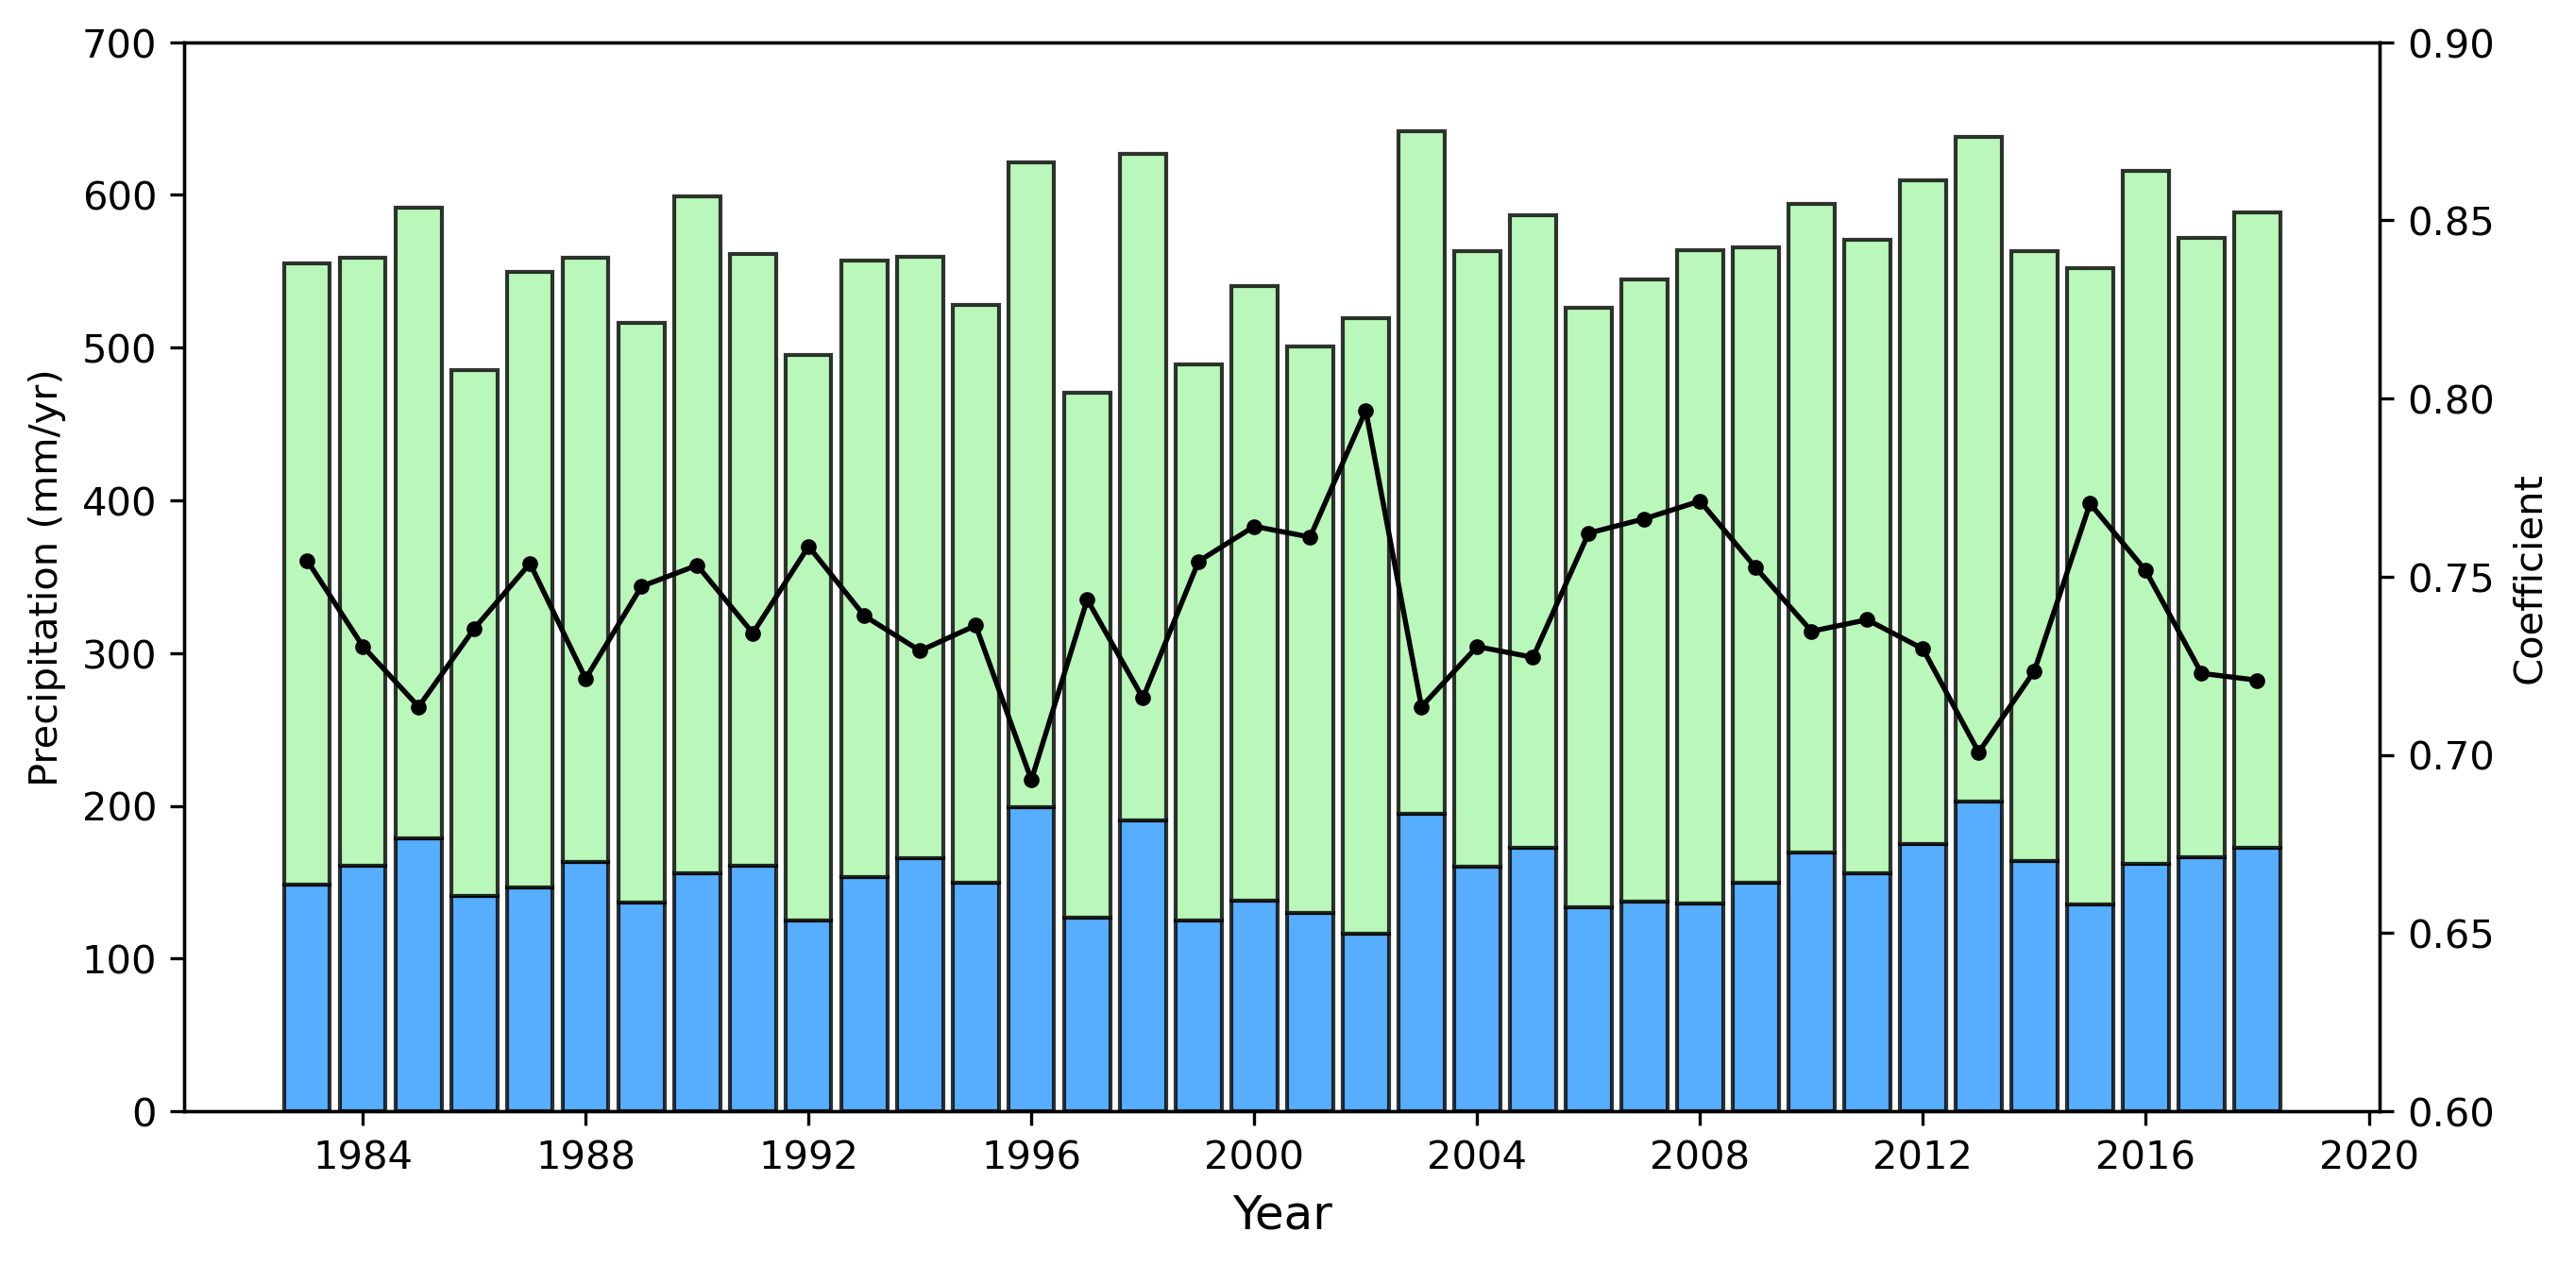

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,5), sharex=False, sharey=False, dpi=300)

ax.bar(df['time'],df['blue_semiwet'],edgecolor='k',facecolor='#2E9AFE',width=300,alpha=0.8)
ax.bar(df['time'],df['green_semiwet'],edgecolor='k',facecolor='#A9F5A9',width=300,alpha=0.8,bottom=df['blue_semiwet'])
ax_=ax.twinx()
ax_.set_ylim(0.6,0.9)
ax.set_ylim(0,700)
ax_.plot(df['time'],df['coef_semiwet'],color='#000000',lw=1.3,marker='o',ms=3)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Precipitation (mm/yr)')
ax_.set_ylabel('Coefficient')

Text(0, 0.5, 'Coefficient')

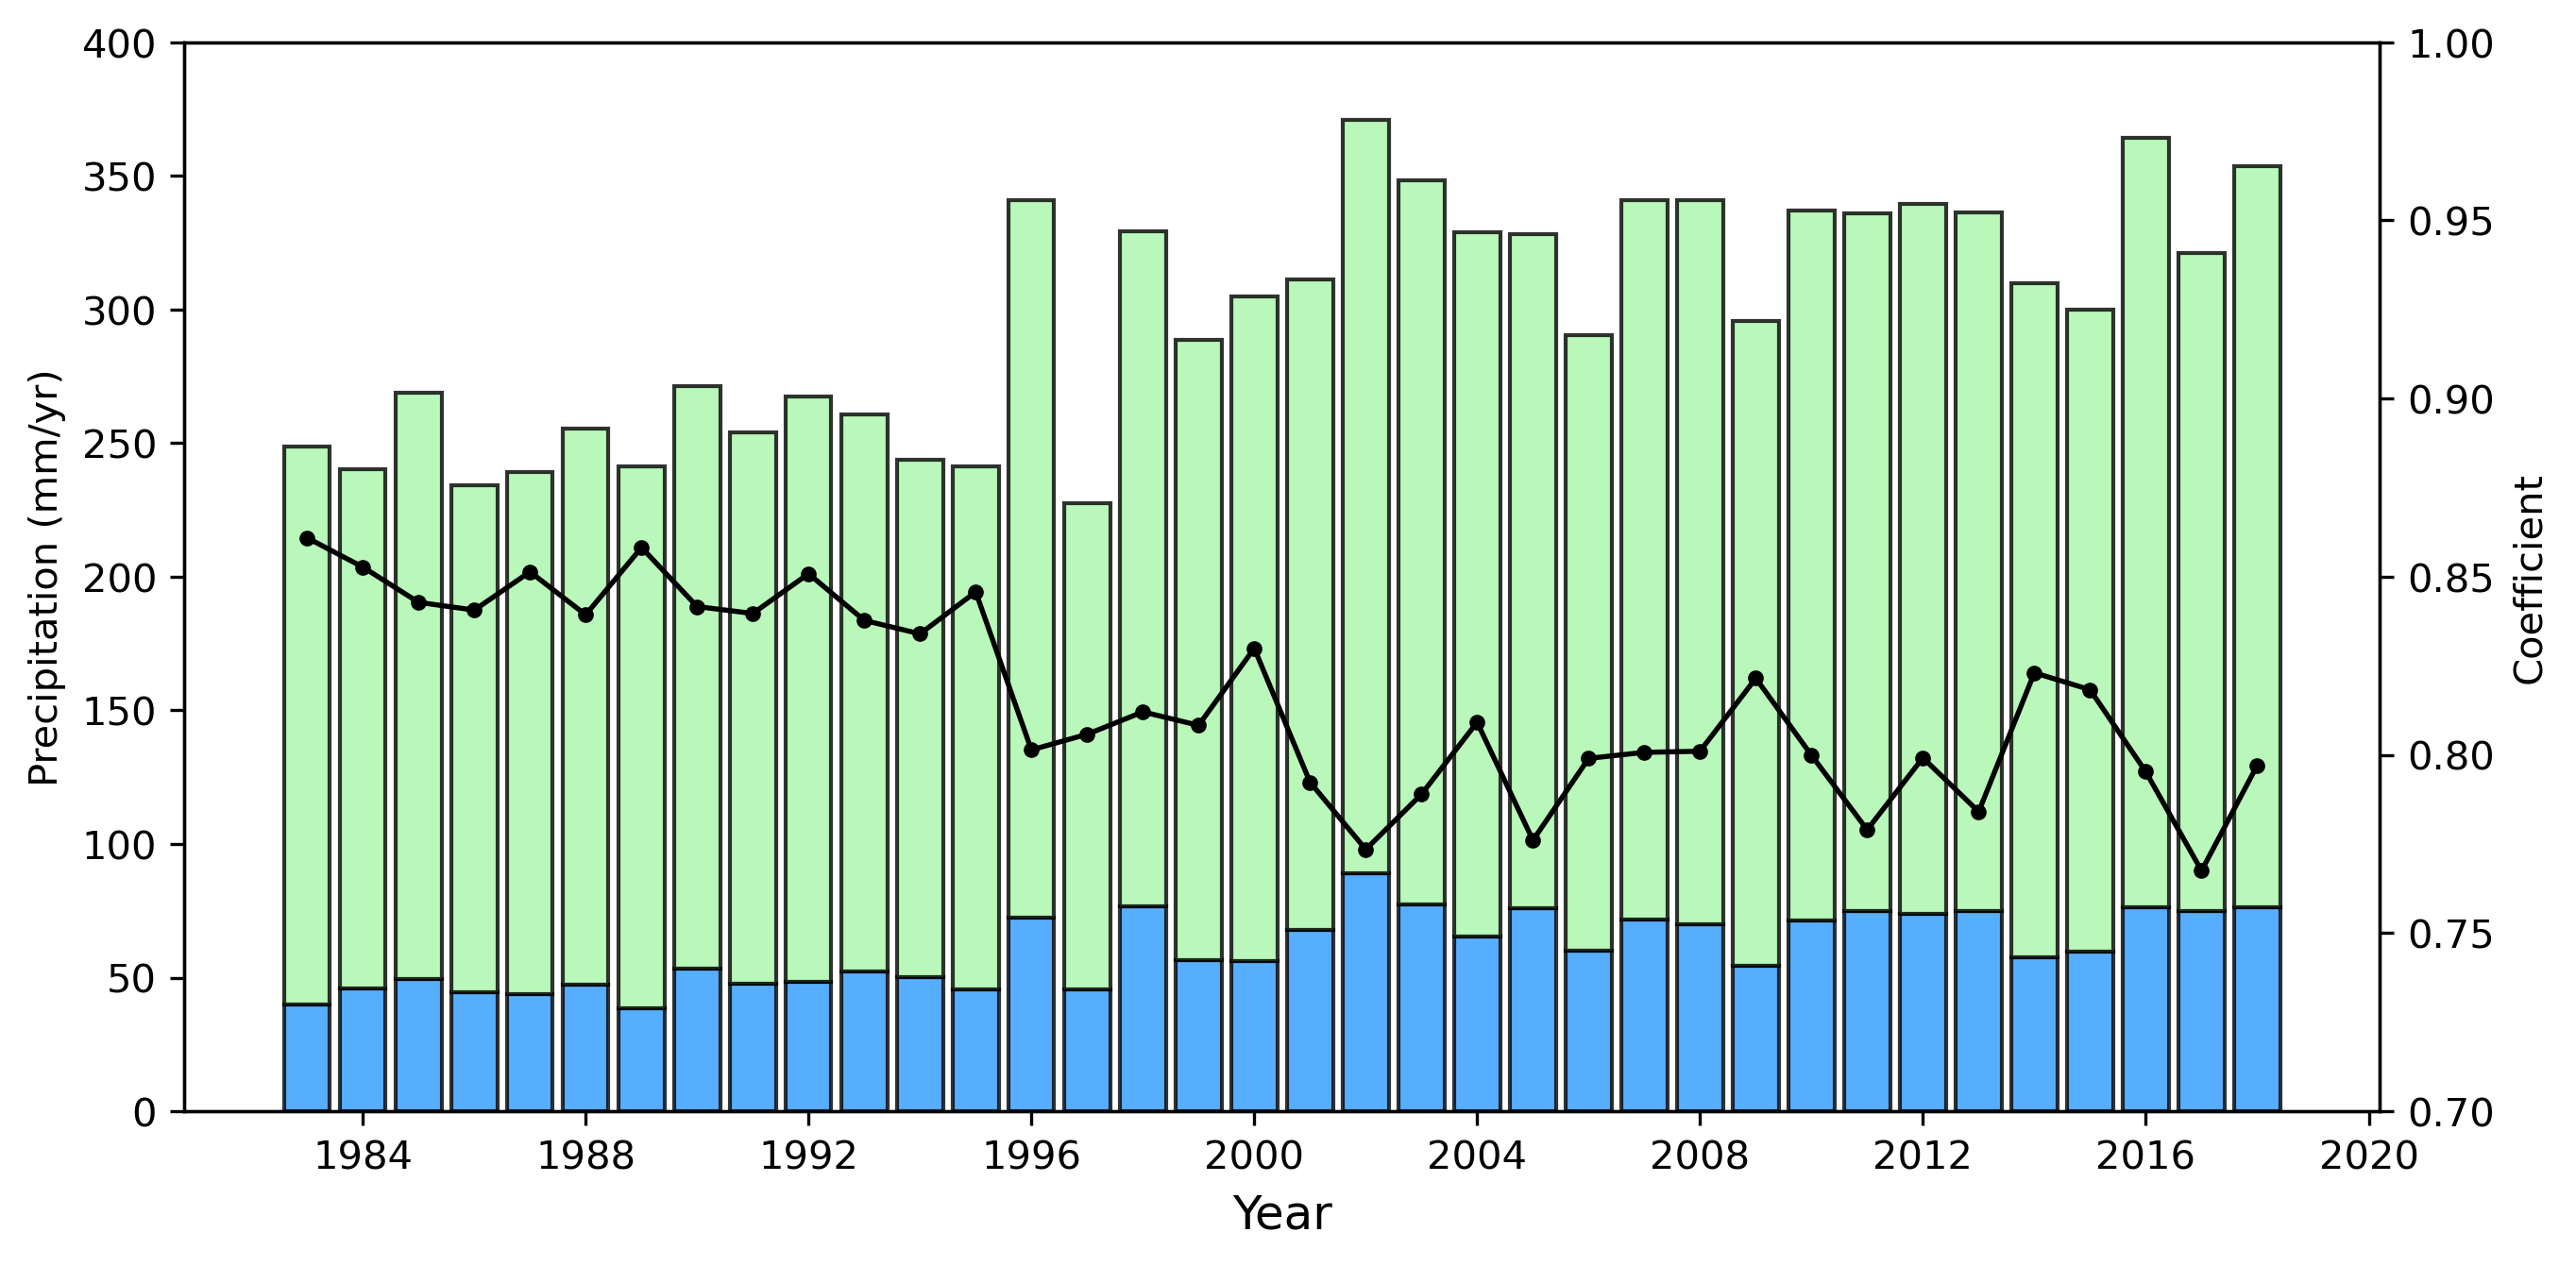

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10,5), sharex=False, sharey=False, dpi=300)

ax.bar(df['time'],df['blue_semidro'],edgecolor='k',facecolor='#2E9AFE',width=300,alpha=0.8,label='Blue water')
ax.bar(df['time'],df['green_semidro'],edgecolor='k',facecolor='#A9F5A9',width=300,alpha=0.8,bottom=df['blue_semidro'],label='Green water')
ax_=ax.twinx()
ax_.set_ylim(0.7,1)
ax.set_ylim(0,400)
ax_.plot(df['time'],df['coef_semidro'],color='#000000',lw=1.3,marker='o',ms=3,label='Coefficient')
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Precipitation (mm/yr)')
ax_.set_ylabel('Coefficient')

Text(0, 0.5, 'Coefficient')

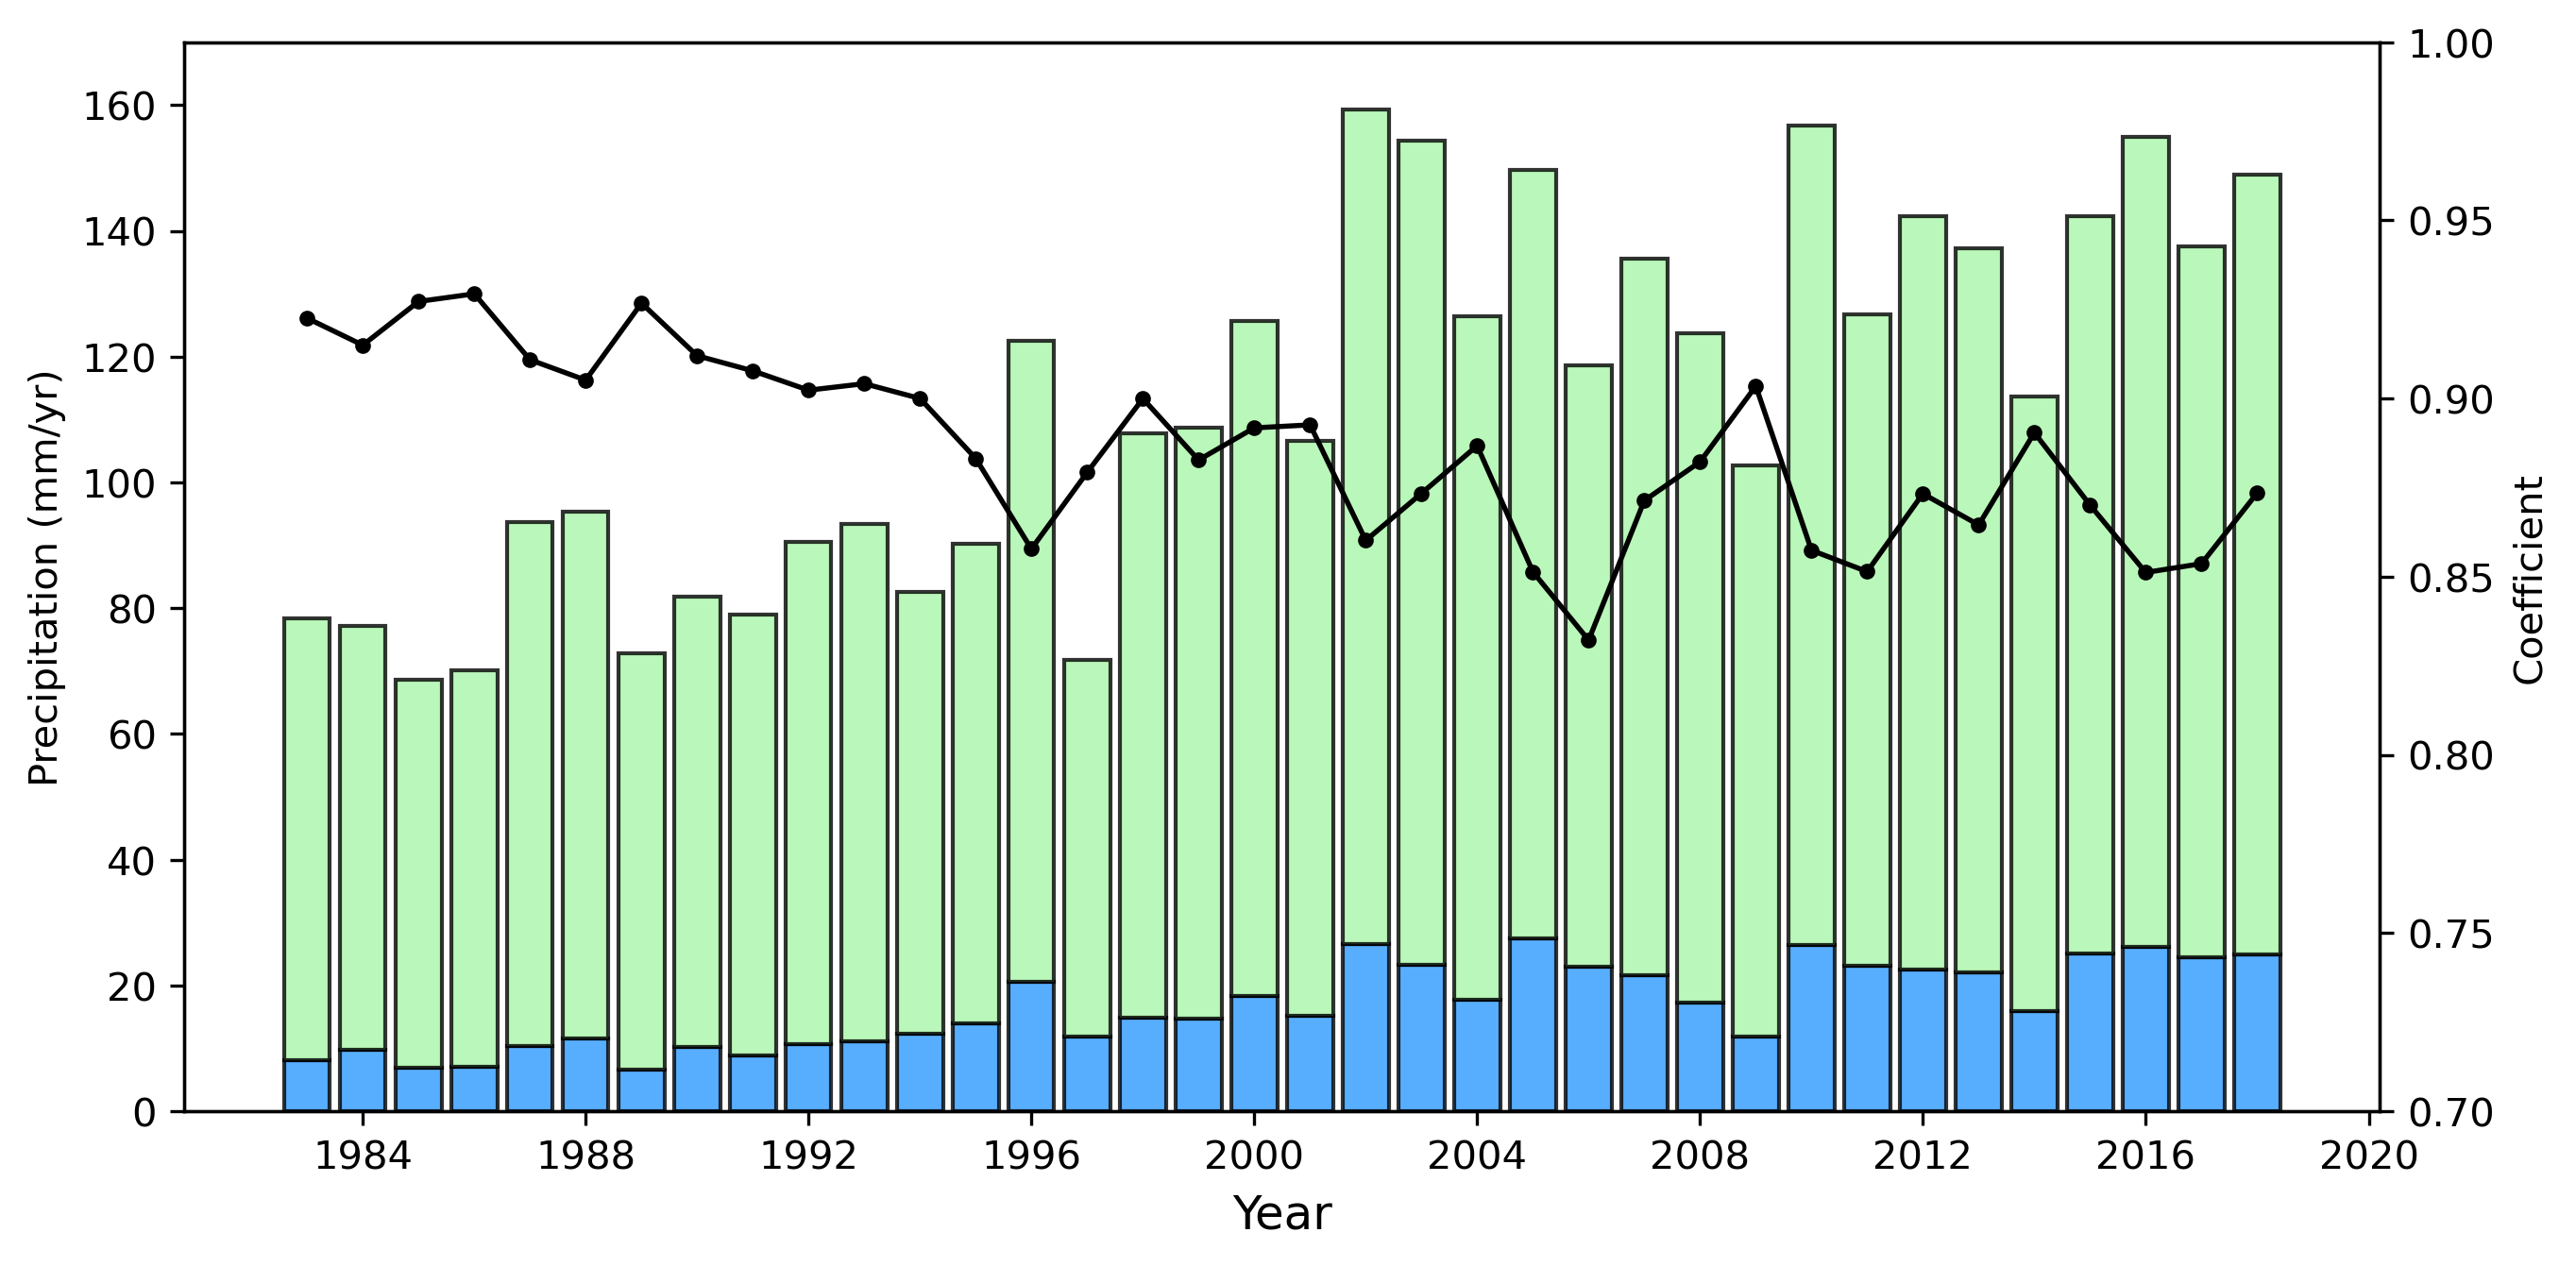

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10,5), sharex=False, sharey=False, dpi=300)

ax.bar(df['time'],df['blue_dro'],edgecolor='k',facecolor='#2E9AFE',width=300,alpha=0.8,label='Blue water')
ax.bar(df['time'],df['green_dro'],edgecolor='k',facecolor='#A9F5A9',width=300,alpha=0.8,bottom=df['blue_dro'],label='Green water')
ax_=ax.twinx()
ax_.set_ylim(0.7,1)
ax.set_ylim(0,170)
ax_.plot(df['time'],df['coef_dro'],color='#000000',lw=1.3,marker='o',ms=3,label = 'Coefficient')
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Precipitation (mm/yr)')
ax_.set_ylabel('Coefficient')

# Thank You